In [1]:
# importing all the required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline                                    #The resulting plots will be stored in the notebook document.
pd.set_option('display.max_columns', 200)             # sets the number of coloumn displayed

UsageError: unrecognized arguments: #The resulting plots will be stored in the notebook document.


In [2]:
#importing the warnings

import warnings
warnings.filterwarnings("ignore")                     


In [3]:
#Reading the dataset file

data = pd.read_csv("application_data.csv")

In [4]:
data

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,0,0,0,0,1.0,0.0,0.0,1.0,0.0,1.0
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
#checking the dtypes of all the coloumns

data.info(verbose =True, null_counts = True )

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Non-Null Count   Dtype  
---   ------                        --------------   -----  
 0    SK_ID_CURR                    307511 non-null  int64  
 1    TARGET                        307511 non-null  int64  
 2    NAME_CONTRACT_TYPE            307511 non-null  object 
 3    CODE_GENDER                   307511 non-null  object 
 4    FLAG_OWN_CAR                  307511 non-null  object 
 5    FLAG_OWN_REALTY               307511 non-null  object 
 6    CNT_CHILDREN                  307511 non-null  int64  
 7    AMT_INCOME_TOTAL              307511 non-null  float64
 8    AMT_CREDIT                    307511 non-null  float64
 9    AMT_ANNUITY                   307499 non-null  float64
 10   AMT_GOODS_PRICE               307233 non-null  float64
 11   NAME_TYPE_SUITE               306219 non-null  object 
 12   NAME_INCOME_TYPE            

In [6]:
#Checking for null values

data.isnull().sum()

SK_ID_CURR                        0
TARGET                            0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
                              ...  
AMT_REQ_CREDIT_BUREAU_DAY     41519
AMT_REQ_CREDIT_BUREAU_WEEK    41519
AMT_REQ_CREDIT_BUREAU_MON     41519
AMT_REQ_CREDIT_BUREAU_QRT     41519
AMT_REQ_CREDIT_BUREAU_YEAR    41519
Length: 122, dtype: int64

In [7]:
#Coverting the null values to percentage and checking accordingly

null_value_percent = data.isnull().sum()*100/len(data)
null_value_percent

SK_ID_CURR                     0.000000
TARGET                         0.000000
NAME_CONTRACT_TYPE             0.000000
CODE_GENDER                    0.000000
FLAG_OWN_CAR                   0.000000
                                ...    
AMT_REQ_CREDIT_BUREAU_DAY     13.501631
AMT_REQ_CREDIT_BUREAU_WEEK    13.501631
AMT_REQ_CREDIT_BUREAU_MON     13.501631
AMT_REQ_CREDIT_BUREAU_QRT     13.501631
AMT_REQ_CREDIT_BUREAU_YEAR    13.501631
Length: 122, dtype: float64

In [8]:
#Filtering the columns with more than 45% of null values

max_null_value = null_value_percent[null_value_percent >= 45]
max_null_value

OWN_CAR_AGE                     65.990810
EXT_SOURCE_1                    56.381073
APARTMENTS_AVG                  50.749729
BASEMENTAREA_AVG                58.515956
YEARS_BEGINEXPLUATATION_AVG     48.781019
YEARS_BUILD_AVG                 66.497784
COMMONAREA_AVG                  69.872297
ELEVATORS_AVG                   53.295980
ENTRANCES_AVG                   50.348768
FLOORSMAX_AVG                   49.760822
FLOORSMIN_AVG                   67.848630
LANDAREA_AVG                    59.376738
LIVINGAPARTMENTS_AVG            68.354953
LIVINGAREA_AVG                  50.193326
NONLIVINGAPARTMENTS_AVG         69.432963
NONLIVINGAREA_AVG               55.179164
APARTMENTS_MODE                 50.749729
BASEMENTAREA_MODE               58.515956
YEARS_BEGINEXPLUATATION_MODE    48.781019
YEARS_BUILD_MODE                66.497784
COMMONAREA_MODE                 69.872297
ELEVATORS_MODE                  53.295980
ENTRANCES_MODE                  50.348768
FLOORSMAX_MODE                  49

In [9]:
#Dropping those columns

df = data.drop(columns = max_null_value.index)

In [10]:
df.shape

(307511, 73)

In [11]:
#Checking for NaN values in the rows and if the NaN percentage is greater then 45%

miss_rows = df.isnull().sum(axis =1)/df.shape[1]
miss_rows[miss_rows > 45]

Series([], dtype: float64)

#### We have taken care of the null values more than or equal to 45% and also checked for null values in the rows as well and dropped them.

In [12]:
#Now we will filter columns with null values lesser than 45% in the dataframe

min_missing_columns = null_value_percent[(null_value_percent<=15) & (null_value_percent>0)].sort_values(ascending=False)
min_missing_columns


AMT_REQ_CREDIT_BUREAU_HOUR    13.501631
AMT_REQ_CREDIT_BUREAU_DAY     13.501631
AMT_REQ_CREDIT_BUREAU_WEEK    13.501631
AMT_REQ_CREDIT_BUREAU_MON     13.501631
AMT_REQ_CREDIT_BUREAU_QRT     13.501631
AMT_REQ_CREDIT_BUREAU_YEAR    13.501631
NAME_TYPE_SUITE                0.420148
OBS_30_CNT_SOCIAL_CIRCLE       0.332021
DEF_30_CNT_SOCIAL_CIRCLE       0.332021
OBS_60_CNT_SOCIAL_CIRCLE       0.332021
DEF_60_CNT_SOCIAL_CIRCLE       0.332021
EXT_SOURCE_2                   0.214626
AMT_GOODS_PRICE                0.090403
AMT_ANNUITY                    0.003902
CNT_FAM_MEMBERS                0.000650
DAYS_LAST_PHONE_CHANGE         0.000325
dtype: float64

In [13]:
#Lets check the coloumns with null values more than 0 and less than 15%

df[['AMT_REQ_CREDIT_BUREAU_YEAR','AMT_REQ_CREDIT_BUREAU_MON','AMT_REQ_CREDIT_BUREAU_WEEK','AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_QRT']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 6 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   AMT_REQ_CREDIT_BUREAU_YEAR  265992 non-null  float64
 1   AMT_REQ_CREDIT_BUREAU_MON   265992 non-null  float64
 2   AMT_REQ_CREDIT_BUREAU_WEEK  265992 non-null  float64
 3   AMT_REQ_CREDIT_BUREAU_DAY   265992 non-null  float64
 4   AMT_REQ_CREDIT_BUREAU_HOUR  265992 non-null  float64
 5   AMT_REQ_CREDIT_BUREAU_QRT   265992 non-null  float64
dtypes: float64(6)
memory usage: 14.1 MB


In [14]:
#As we see that these coloumns are of numerical type and these coloumns give the year, month and day of the credit request 
#raised to the BUREAU, we can impute the data with the mode which would be 0.

min_null_col = df[['AMT_REQ_CREDIT_BUREAU_YEAR','AMT_REQ_CREDIT_BUREAU_MON','AMT_REQ_CREDIT_BUREAU_WEEK','AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_QRT']]
for i in min_null_col:
    if min_null_col[i].isnull().sum()> 0:
        m = min_null_col[i].mode()[0]
        min_null_col[i].fillna(m, inplace = True)

100*min_null_col.isnull().mean().sort_values(ascending = False)

AMT_REQ_CREDIT_BUREAU_YEAR    0.0
AMT_REQ_CREDIT_BUREAU_MON     0.0
AMT_REQ_CREDIT_BUREAU_WEEK    0.0
AMT_REQ_CREDIT_BUREAU_DAY     0.0
AMT_REQ_CREDIT_BUREAU_HOUR    0.0
AMT_REQ_CREDIT_BUREAU_QRT     0.0
dtype: float64

In [15]:
#Checking for the null values being removed or not

min_null_col.isnull().sum()

AMT_REQ_CREDIT_BUREAU_YEAR    0
AMT_REQ_CREDIT_BUREAU_MON     0
AMT_REQ_CREDIT_BUREAU_WEEK    0
AMT_REQ_CREDIT_BUREAU_DAY     0
AMT_REQ_CREDIT_BUREAU_HOUR    0
AMT_REQ_CREDIT_BUREAU_QRT     0
dtype: int64

In [16]:
# Checking the dataset and dropping unwanted coloumns for a better analysis

df.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL',
       'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS',
       'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY',
       'ORGANIZATION_TYPE', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_C

In [17]:
#Getting rid of unwanted columns

unwanted_col = ['FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE','FLAG_EMAIL',
          'REGION_RATING_CLIENT','REGION_RATING_CLIENT_W_CITY', 'FLAG_EMAIL','DAYS_LAST_PHONE_CHANGE',
          'FLAG_DOCUMENT_2','REG_REGION_NOT_LIVE_REGION','REG_REGION_NOT_WORK_REGION',
          'LIVE_REGION_NOT_WORK_REGION','FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4','FLAG_DOCUMENT_5',
          'FLAG_DOCUMENT_6','FLAG_DOCUMENT_7','FLAG_DOCUMENT_8','FLAG_DOCUMENT_9','FLAG_DOCUMENT_10',
          'FLAG_DOCUMENT_11','FLAG_DOCUMENT_12','FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14',
          'FLAG_DOCUMENT_15','FLAG_DOCUMENT_16','FLAG_DOCUMENT_17','FLAG_DOCUMENT_18',
          'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21']

df.drop(columns=unwanted_col, inplace=True)

In [18]:
df.shape

(307511, 42)

In [19]:
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,2.0,2.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,2.0,0.0,2.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### As we have removed most of the null values from the dataset, we will check for the datatypes of the columns and change them accordingly.

In [20]:
#checking the numerical columns

df.describe().columns

Index(['SK_ID_CURR', 'TARGET', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL', 'CNT_FAM_MEMBERS',
       'HOUR_APPR_PROCESS_START', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'EXT_SOURCE_2',
       'EXT_SOURCE_3', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
       'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY',
       'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON',
       'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object')

In [21]:
#checking the categorical columns

list(set(df.columns) - set(df.describe().columns))

['NAME_HOUSING_TYPE',
 'OCCUPATION_TYPE',
 'FLAG_OWN_CAR',
 'NAME_CONTRACT_TYPE',
 'NAME_TYPE_SUITE',
 'CODE_GENDER',
 'ORGANIZATION_TYPE',
 'NAME_EDUCATION_TYPE',
 'FLAG_OWN_REALTY',
 'WEEKDAY_APPR_PROCESS_START',
 'NAME_INCOME_TYPE',
 'NAME_FAMILY_STATUS']

In [22]:
#Checking for the number of unique values in the column

df.nunique().sort_values()

LIVE_CITY_NOT_WORK_CITY            2
REG_CITY_NOT_WORK_CITY             2
FLAG_MOBIL                         2
FLAG_OWN_REALTY                    2
REG_CITY_NOT_LIVE_CITY             2
NAME_CONTRACT_TYPE                 2
TARGET                             2
FLAG_OWN_CAR                       2
CODE_GENDER                        3
AMT_REQ_CREDIT_BUREAU_HOUR         5
NAME_EDUCATION_TYPE                5
NAME_HOUSING_TYPE                  6
NAME_FAMILY_STATUS                 6
NAME_TYPE_SUITE                    7
WEEKDAY_APPR_PROCESS_START         7
NAME_INCOME_TYPE                   8
AMT_REQ_CREDIT_BUREAU_DAY          9
AMT_REQ_CREDIT_BUREAU_WEEK         9
DEF_60_CNT_SOCIAL_CIRCLE           9
DEF_30_CNT_SOCIAL_CIRCLE          10
AMT_REQ_CREDIT_BUREAU_QRT         11
CNT_CHILDREN                      15
CNT_FAM_MEMBERS                   17
OCCUPATION_TYPE                   18
AMT_REQ_CREDIT_BUREAU_MON         24
HOUR_APPR_PROCESS_START           24
AMT_REQ_CREDIT_BUREAU_YEAR        25
O

#### As we can see from the above information that the values above "ORGANIZATION_TYPE" might be categorical in nature as there is less number of unique value and all the data can be categorised between them.

In [23]:
categorical_cols = ['FLAG_MOBIL', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR',
                    'FLAG_OWN_REALTY', 'REG_CITY_NOT_WORK_CITY','LIVE_CITY_NOT_WORK_CITY',
                    'REG_CITY_NOT_LIVE_CITY','AMT_REQ_CREDIT_BUREAU_HOUR', 'NAME_EDUCATION_TYPE',
                    'NAME_HOUSING_TYPE', 'NAME_FAMILY_STATUS', 'WEEKDAY_APPR_PROCESS_START',
                    'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'AMT_REQ_CREDIT_BUREAU_DAY',
                    'AMT_REQ_CREDIT_BUREAU_WEEK', 'DEF_60_CNT_SOCIAL_CIRCLE','DEF_30_CNT_SOCIAL_CIRCLE',
                    'AMT_REQ_CREDIT_BUREAU_QRT', 'CNT_CHILDREN','CNT_FAM_MEMBERS',
                    'HOUR_APPR_PROCESS_START','AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_YEAR',
                    'OBS_60_CNT_SOCIAL_CIRCLE','OBS_30_CNT_SOCIAL_CIRCLE','ORGANIZATION_TYPE',]
for c in categorical_cols:
    df[c] = df[c].astype('category')

In [24]:
# We will also change the SK_ID_CURR column to object as the customer ID cannot be changed

df['SK_ID_CURR'] = df['SK_ID_CURR'].astype('object')

In [25]:
# we will check the dtypes again to confirm

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 42 columns):
 #   Column                      Non-Null Count   Dtype   
---  ------                      --------------   -----   
 0   SK_ID_CURR                  307511 non-null  object  
 1   TARGET                      307511 non-null  category
 2   NAME_CONTRACT_TYPE          307511 non-null  category
 3   CODE_GENDER                 307511 non-null  category
 4   FLAG_OWN_CAR                307511 non-null  category
 5   FLAG_OWN_REALTY             307511 non-null  category
 6   CNT_CHILDREN                307511 non-null  category
 7   AMT_INCOME_TOTAL            307511 non-null  float64 
 8   AMT_CREDIT                  307511 non-null  float64 
 9   AMT_ANNUITY                 307499 non-null  float64 
 10  AMT_GOODS_PRICE             307233 non-null  float64 
 11  NAME_TYPE_SUITE             306219 non-null  category
 12  NAME_INCOME_TYPE            307511 non-null  category
 13 

In [26]:
#Checking on the dataset, we see that the coloumns "DAYS_BIRTH",'DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH' have negative values which is not possible.
# so we will fix this values.

df[['DAYS_BIRTH' ,'DAYS_EMPLOYED' ,'DAYS_REGISTRATION' ,'DAYS_ID_PUBLISH']]

,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH
0,-9461,-637,-3648.0,-2120
1,-16765,-1188,-1186.0,-291
2,-19046,-225,-4260.0,-2531
3,-19005,-3039,-9833.0,-2437
4,-19932,-3038,-4311.0,-3458
...,...,...,...,...
307506,-9327,-236,-8456.0,-1982
307507,-20775,365243,-4388.0,-4090
307508,-14966,-7921,-6737.0,-5150
307509,-11961,-4786,-2562.0,-931


In [27]:
#We will first cast the days coloumns to the list "days_col" 
#and then perform the operation with abs and change them all to years at once

days_col = ['DAYS_BIRTH','DAYS_EMPLOYED' ,'DAYS_REGISTRATION' ,'DAYS_ID_PUBLISH']
df[days_col] = df[days_col].abs()
df[days_col] = df[days_col]/365
df[days_col].describe()

,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH
count,307511.000000,307511.000000,307511.000000,307511.000000
mean,43.936973,185.547239,13.660604,8.203294
std,11.956133,382.037676,9.651743,4.135481
min,20.517808,0.000000,0.000000,0.000000
25%,34.008219,2.556164,5.506849,4.712329
50%,43.150685,6.079452,12.339726,8.915068
75%,53.923288,15.635616,20.491781,11.778082
max,69.120548,1000.665753,67.594521,19.717808


In [28]:
#As the days have been converted to years we should rename the columns as well

df.rename(columns={'DAYS_BIRTH':'YEARS_BIRTH' ,'DAYS_EMPLOYED':'YEARS_EMPLOYED' ,
    'DAYS_REGISTRATION':'YEARS_REGISTRATION' ,'DAYS_ID_PUBLISH':'YEARS_ID_PUBLISH'}, inplace=True)

In [29]:
# we will now check gender column categorical dataset

df['CODE_GENDER'].value_counts()

F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

In [30]:
# Since gender variable contains categorical value, so we will replace XNA with F based on mode value

df.loc[df['CODE_GENDER']=='XNA', 'CODE_GENDER'] = 'F'
df['CODE_GENDER'].value_counts()

F      202452
M      105059
XNA         0
Name: CODE_GENDER, dtype: int64

### Now we can take the dataset and look into the numerical datatypes and check for outliers

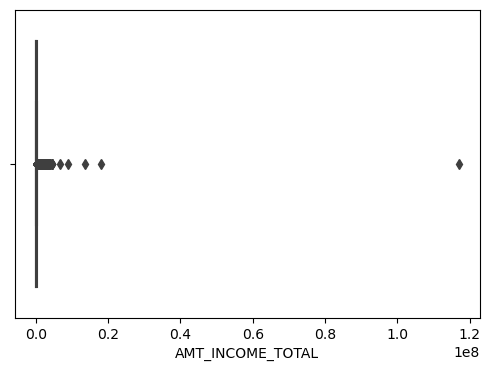

In [95]:
#We will check for the outliers in the "AMT_INCOME_TOTAL" using boxplot and see that one income is very high compared to the
#rest and hence defining an outlier

plt.figure(figsize =(6,4))

sns.boxplot(df['AMT_INCOME_TOTAL'])
plt.show()

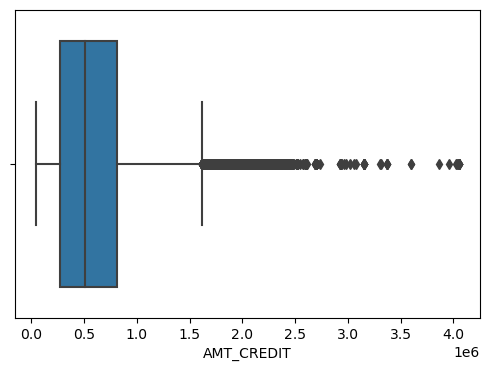

In [96]:
#Checking for outlier in the "AMT_CREDIT" column and we can see that some of the datapoints are in the extreme right
#but they can't be treated as outlier as there are clusters indicating that it is possible to get that kind of high credit

plt.figure(figsize =(6,4))

sns.boxplot(df['AMT_CREDIT'])
plt.show()

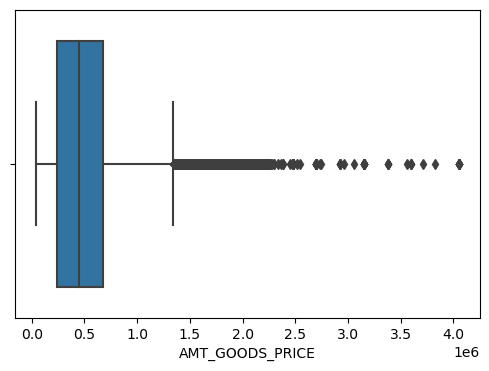

In [97]:
#Checking for outlier in the 'AMT_GOODS_PRICE' and it has no outlying value as such.

plt.figure(figsize =(6,4))

sns.boxplot(df['AMT_GOODS_PRICE'])
plt.show()

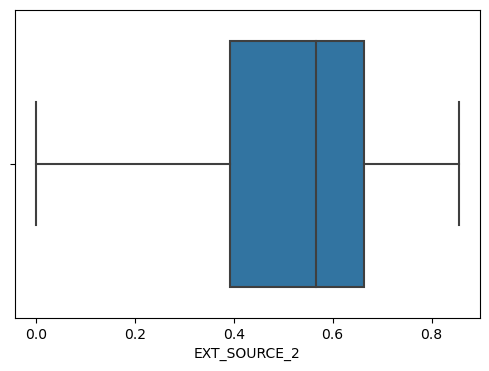

In [98]:
#Checking the normalised score from external source 2 for outliers but we can see there is no outlier in this column

plt.figure(figsize =(6,4))

sns.boxplot(df['EXT_SOURCE_2'])
plt.show()

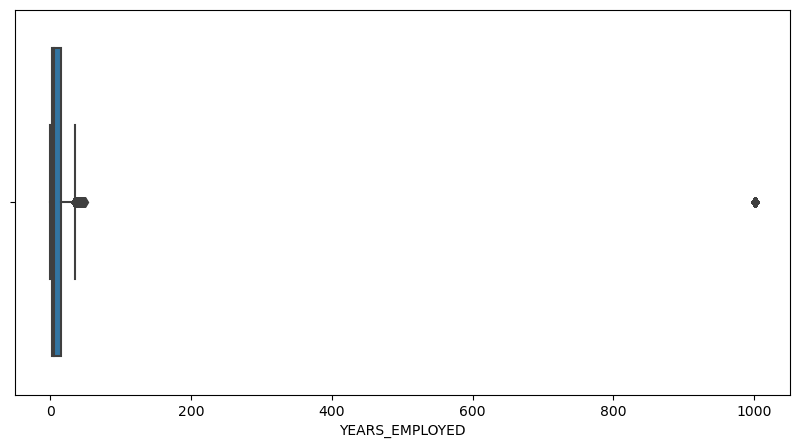

In [100]:
#Checking the outliers in the columns 'YEARS_EMPLOYED' and we see that one point is going as high as 1000 
#which can be treated as an outlier

plt.figure(figsize = (10,5))
sns.boxplot(df['YEARS_EMPLOYED'])
plt.show()

#### Checking on the continous datatypes and creating bins for them so that we can get a better understanding for the values present

In [36]:
#Considering for "AMT_INCOME_TOTAL" and "AMT_CREDIT" columns

df[['AMT_INCOME_TOTAL','AMT_CREDIT']].describe()

,AMT_INCOME_TOTAL,AMT_CREDIT
count,3.075110e+05,3.075110e+05
mean,1.687979e+05,5.990260e+05
std,2.371231e+05,4.024908e+05
min,2.565000e+04,4.500000e+04
25%,1.125000e+05,2.700000e+05
50%,1.471500e+05,5.135310e+05
75%,2.025000e+05,8.086500e+05
max,1.170000e+08,4.050000e+06


In [37]:
# Here we can see that the data is continous in type, so we will create two new coloumns and divide the data accordingly 
# between them

bins = [0,100000,250000,500000,750000,1000000, 1250000, 1500000, 1750000, 2000000, 2250000,2500000,
        2750000,3000000,3250000,3500000,3750000,4000000,4250000,4500000,4750000,5000000,150000000]
ranges = ['0-100000','100000-250000','250000-500000','500000-750000','750000-1000000', '1000000-1250000',
          '1250000-1500000','1500000-1750000','1750000-2000000','2000000-2250000','2250000-2500000',
          '2500000-2750000','2750000-3000000','3000000-3250000','3250000-3500000','3500000-3750000',
          '3750000-4000000','4000000-4250000','4250000-4500000','4500000-4750000','4750000-5000000',
          '5000000 and above']
df['INCOME_RANGE'] = pd.cut(df['AMT_INCOME_TOTAL'],bins,labels=ranges)
df['CREDIT_RANGE'] = pd.cut(df['AMT_CREDIT'],bins,labels=ranges) 
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,INCOME_RANGE,CREDIT_RANGE
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,2.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,100000-250000,250000-500000
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,250000-500000,1250000-1500000
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0-100000,100000-250000
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,2.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,100000-250000,250000-500000
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100000-250000,500000-750000


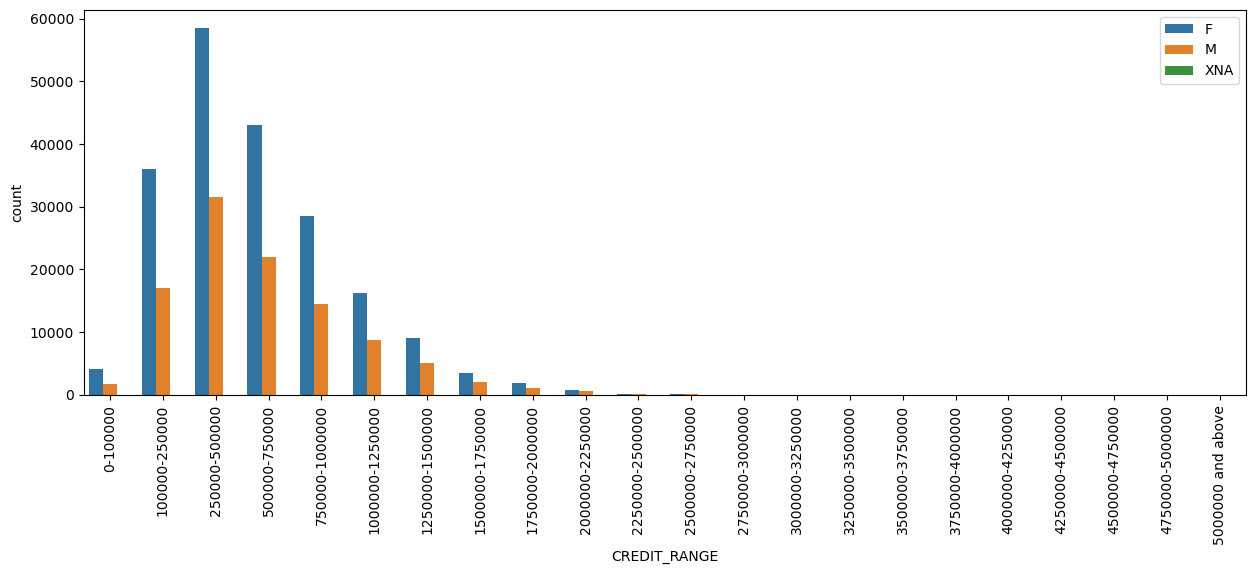

In [102]:
#Now we can plot the countplot on the 'AMT_CREDIT_RANGE' coloumns on the basis of 'CODE_GENDER' column and gain insight as 
#which gender is more likely to apply for more credit and the frequency at which he/she applies for it.

plt.figure(figsize=(15,5)) 
sns.countplot(data= df,x='CREDIT_RANGE', hue='CODE_GENDER')
plt.xticks(rotation=90)
plt.legend(loc='upper right')
plt.show()

### Now we will check for data imbalance in the "application dataset" by dividing the the dataframe on the basis of "Target" column.
### As the target column has 0 and 1 which shows the people having difficulty paying the credit amount with 1 and the ones without any difficulty as 0.

In [39]:
#Checking the values in the "TARGET" column

df['TARGET'].value_counts()

0    282686
1     24825
Name: TARGET, dtype: int64

In [40]:
#Creating new dataframe with the target variable 0

df_target0 = df[df['TARGET'] == 0]
df_target0

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,INCOME_RANGE,CREDIT_RANGE
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,250000-500000,1250000-1500000
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0-100000,100000-250000
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,2.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,100000-250000,250000-500000
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100000-250000,500000-750000
5,100008,0,Cash loans,M,N,Y,0,99000.0,490495.5,27517.5,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0-100000,250000-500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307505,456249,0,Cash loans,F,N,Y,0,112500.0,225000.0,22050.0,...,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,100000-250000,100000-250000
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,100000-250000,250000-500000
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0-100000,250000-500000
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,6.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,100000-250000,500000-750000


In [41]:
#Creating new dataframe with the target variable 1

df_target1 = df[df['TARGET'] == 1]
df_target1

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,INCOME_RANGE,CREDIT_RANGE
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,2.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,100000-250000,250000-500000
26,100031,1,Cash loans,F,N,Y,0,112500.0,979992.0,27076.5,...,10.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,100000-250000,750000-1000000
40,100047,1,Cash loans,M,N,Y,0,202500.0,1193580.0,35028.0,...,0.0,0.0,0.0,0.0,0.0,2.0,0.0,4.0,100000-250000,1000000-1250000
42,100049,1,Cash loans,F,N,N,0,135000.0,288873.0,16258.5,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,100000-250000,250000-500000
81,100096,1,Cash loans,F,N,Y,0,81000.0,252000.0,14593.5,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0-100000,250000-500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307448,456186,1,Cash loans,M,N,N,1,207000.0,450000.0,32746.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,100000-250000,250000-500000
307475,456215,1,Cash loans,F,N,N,1,144000.0,1303200.0,46809.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,6.0,100000-250000,1250000-1500000
307481,456225,1,Cash loans,M,N,Y,0,225000.0,297000.0,19975.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,100000-250000,250000-500000
307489,456233,1,Cash loans,F,N,Y,0,225000.0,521280.0,23089.5,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,100000-250000,500000-750000


In [42]:
#checking the shape of the new dataframes

df_target0.shape

(282686, 44)

In [43]:
df_target1.shape

(24825, 44)

In [44]:
#As we can see that there is a clear data imbalance on these new dataframes, we can check the ratio of data imbalance
#on the df dataframe by the help of these new dataframes

Ratio = df_target0.shape[0]/df_target1.shape[0]
Ratio

11.387150050352467

#### We can see that the ratio of data Imbalance is 11.38 which indicated the ratio of data 0:1
#### This indicates that for atleast 11 values of 0 (non difficultly in payment) we will have 1 value of 1(difficulty in payment)
#### Which may be considered as an highly imbalanced dataset.

### We will now try to find the correlation of the columns of the two new dataframes separately 

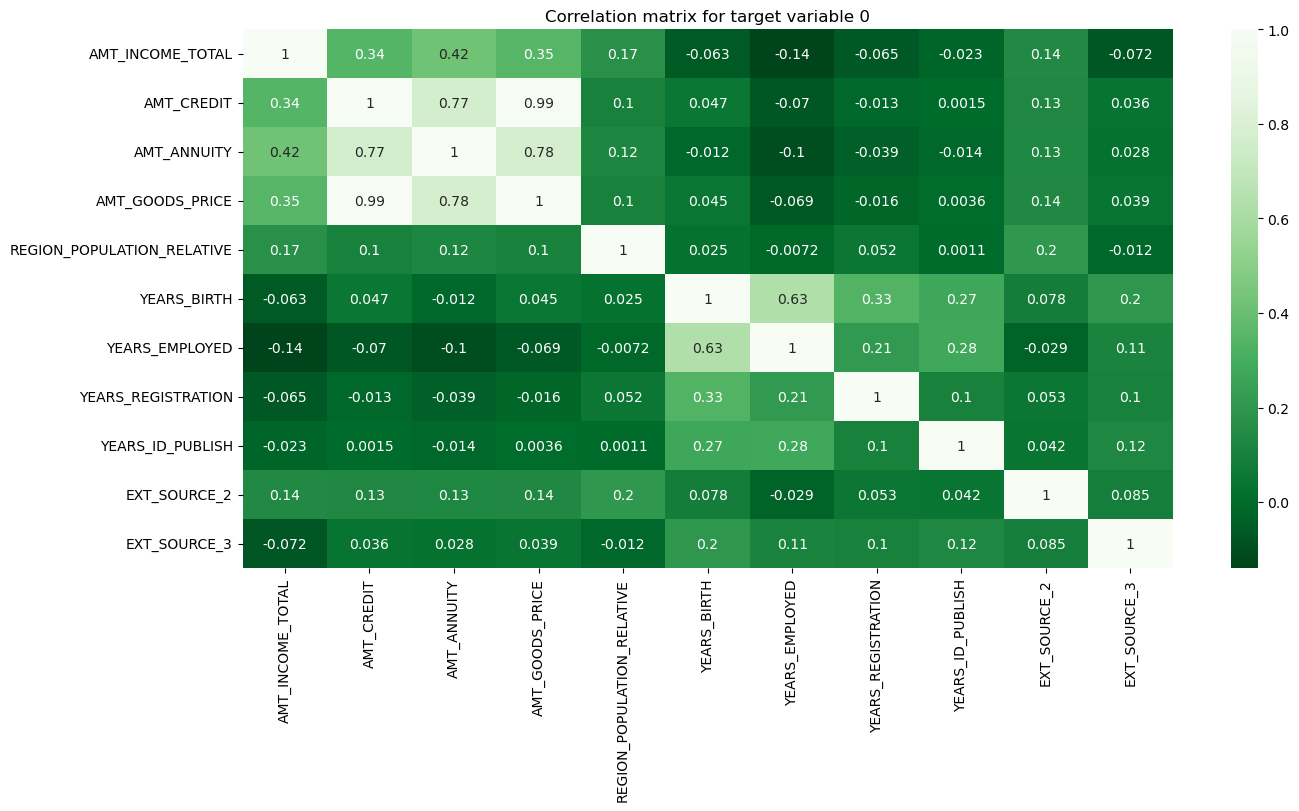

In [105]:
#Plotting heatmap for the target variable 0

plt.figure(figsize=(15,7)) 
sns.heatmap(df_target0.corr(), annot=True, cmap="Greens_r")
plt.title('Correlation matrix for target variable 0')
plt.show()

In [46]:
#Top 10 correlations for target variable 0

corr_matrix0 = df_target0.corr()
matrix0 = corr_matrix0.where(np.triu(np.ones(corr_matrix0.shape), k=1).astype(np.bool))
matrix0 = matrix0.unstack().reset_index().dropna(subset = [0])
matrix0.columns = ['VAR1', 'VAR2', 'Correlation_Value']
matrix0['Corr_abs'] = abs(matrix0['Correlation_Value'])
matrix0.sort_values(by = "Corr_abs", ascending =False, inplace = True)
matrix0.head(10)

,VAR1,VAR2,Correlation_Value,Corr_abs
34,AMT_GOODS_PRICE,AMT_CREDIT,0.987250,0.987250
35,AMT_GOODS_PRICE,AMT_ANNUITY,0.776686,0.776686
23,AMT_ANNUITY,AMT_CREDIT,0.771309,0.771309
71,YEARS_EMPLOYED,YEARS_BIRTH,0.626114,0.626114
22,AMT_ANNUITY,AMT_INCOME_TOTAL,0.418953,0.418953
33,AMT_GOODS_PRICE,AMT_INCOME_TOTAL,0.349462,0.349462
11,AMT_CREDIT,AMT_INCOME_TOTAL,0.342799,0.342799
82,YEARS_REGISTRATION,YEARS_BIRTH,0.333151,0.333151
94,YEARS_ID_PUBLISH,YEARS_EMPLOYED,0.276663,0.276663
93,YEARS_ID_PUBLISH,YEARS_BIRTH,0.271314,0.271314


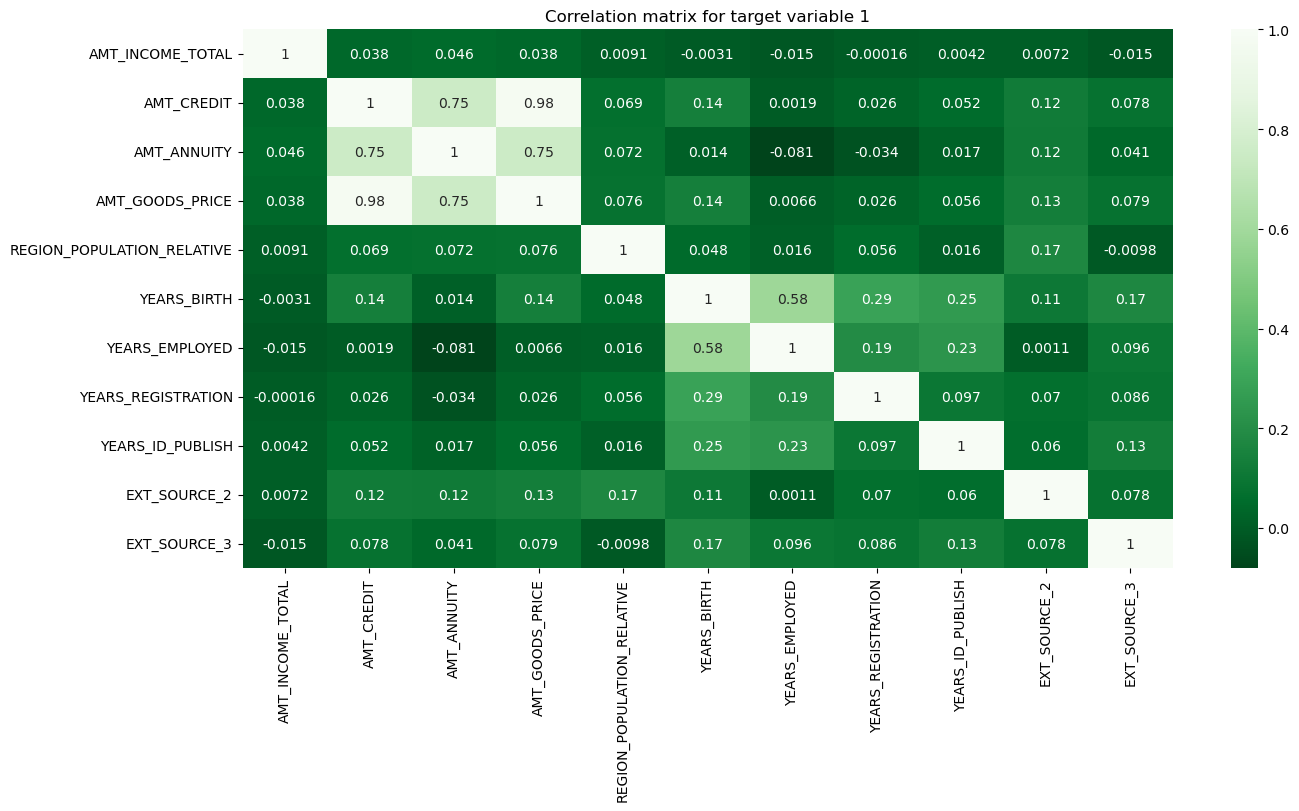

In [106]:
#Plotting heatmap for the target variable 1

plt.figure(figsize=(15,7))
sns.heatmap(df_target1.corr(),annot = True, cmap = "Greens_r")
plt.title('Correlation matrix for target variable 1')
plt.show()

In [48]:
#Top 10 correlations for target variable 1

corr_matrix1 = df_target1.corr()
matrix1 = corr_matrix1.where(np.triu(np.ones(corr_matrix1.shape), k=1).astype(np.bool))
matrix1 = matrix1.unstack().reset_index().dropna(subset = [0])
matrix1.columns = ['VAR1', 'VAR2', 'Correlation_Value']
matrix1['Corr_abs'] = abs(matrix1['Correlation_Value'])
matrix1.sort_values(by = "Corr_abs", ascending =False, inplace = True)
matrix1.head(10)

,VAR1,VAR2,Correlation_Value,Corr_abs
34,AMT_GOODS_PRICE,AMT_CREDIT,0.983103,0.983103
35,AMT_GOODS_PRICE,AMT_ANNUITY,0.752699,0.752699
23,AMT_ANNUITY,AMT_CREDIT,0.752195,0.752195
71,YEARS_EMPLOYED,YEARS_BIRTH,0.582185,0.582185
82,YEARS_REGISTRATION,YEARS_BIRTH,0.289114,0.289114
93,YEARS_ID_PUBLISH,YEARS_BIRTH,0.252863,0.252863
94,YEARS_ID_PUBLISH,YEARS_EMPLOYED,0.229090,0.229090
83,YEARS_REGISTRATION,YEARS_EMPLOYED,0.192455,0.192455
115,EXT_SOURCE_3,YEARS_BIRTH,0.171621,0.171621
103,EXT_SOURCE_2,REGION_POPULATION_RELATIVE,0.169751,0.169751


#### We can see from the correlation that the data is almost similar for the first 3 values and then there is change.

### Now we will perform Univariate on the Numerical Variables for both 0 and 1 target variable

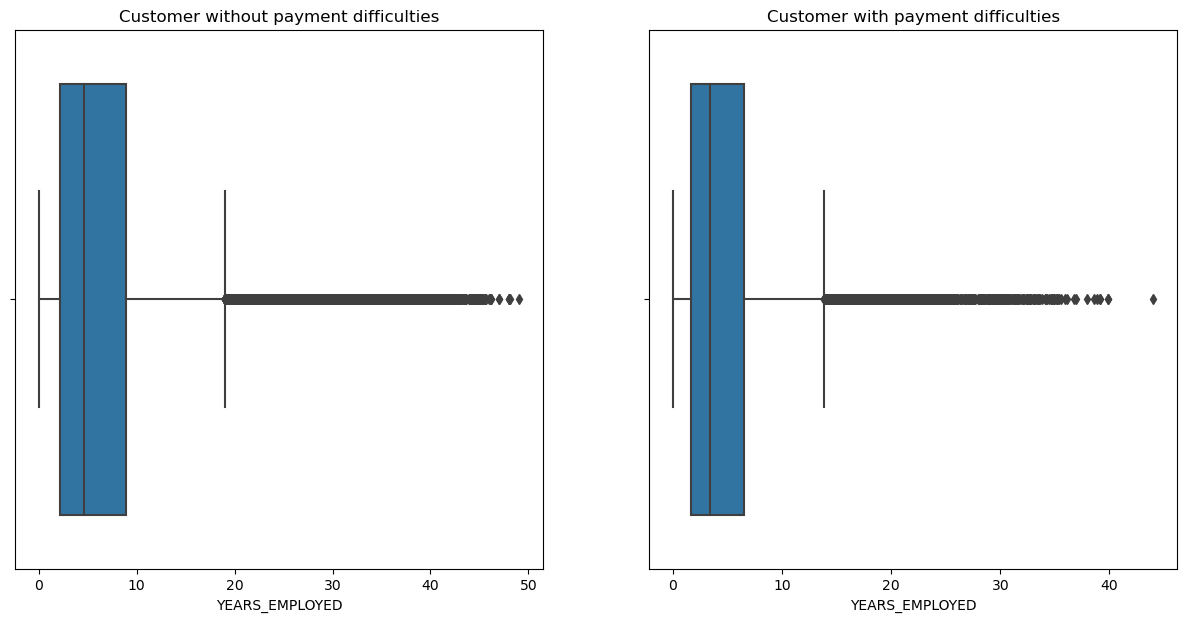

In [49]:
#Checking plots for YEARS_EMPLOYED and comparing for target variable 0 and 1

plt.figure(figsize=(15,7)) 

plt.subplot(1,2,1)
ax = sns.boxplot(df_target0[df_target0['YEARS_EMPLOYED']<1000]['YEARS_EMPLOYED'])
plt.title('Customer without payment difficulties')

plt.subplot(1,2,2)
ax = sns.boxplot(df_target1[df_target1['YEARS_EMPLOYED']<1000]['YEARS_EMPLOYED'])
plt.title('Customer with payment difficulties')
plt.show()

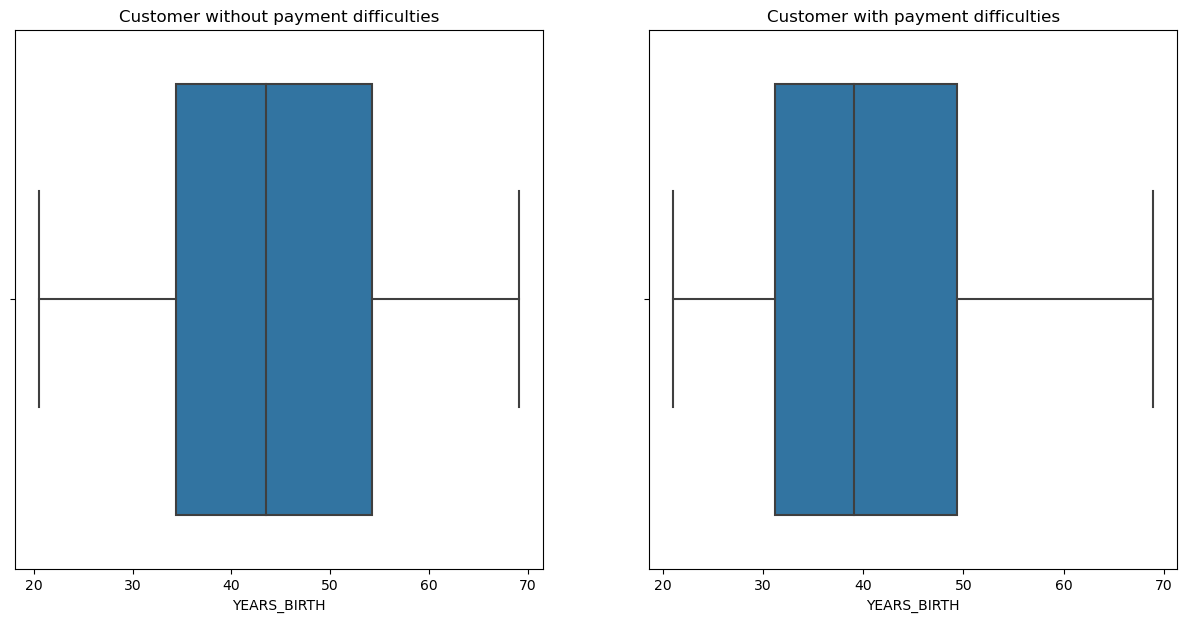

In [50]:
#Checking plots for YEARS_BIRTH and comparing for target variable 0 and 1

plt.figure(figsize=(15,7)) 

plt.subplot(1,2,1)
ax = sns.boxplot(df_target0['YEARS_BIRTH'])
plt.title('Customer without payment difficulties')

plt.subplot(1,2,2)
ax = sns.boxplot(df_target1['YEARS_BIRTH'])
plt.title('Customer with payment difficulties')
plt.show()

#### Here we can see from the above plots that the customers with difficulties has years between 32 - 49 years and the ones with no difficulties has years between 34-54 years.

### Checking for categorical values

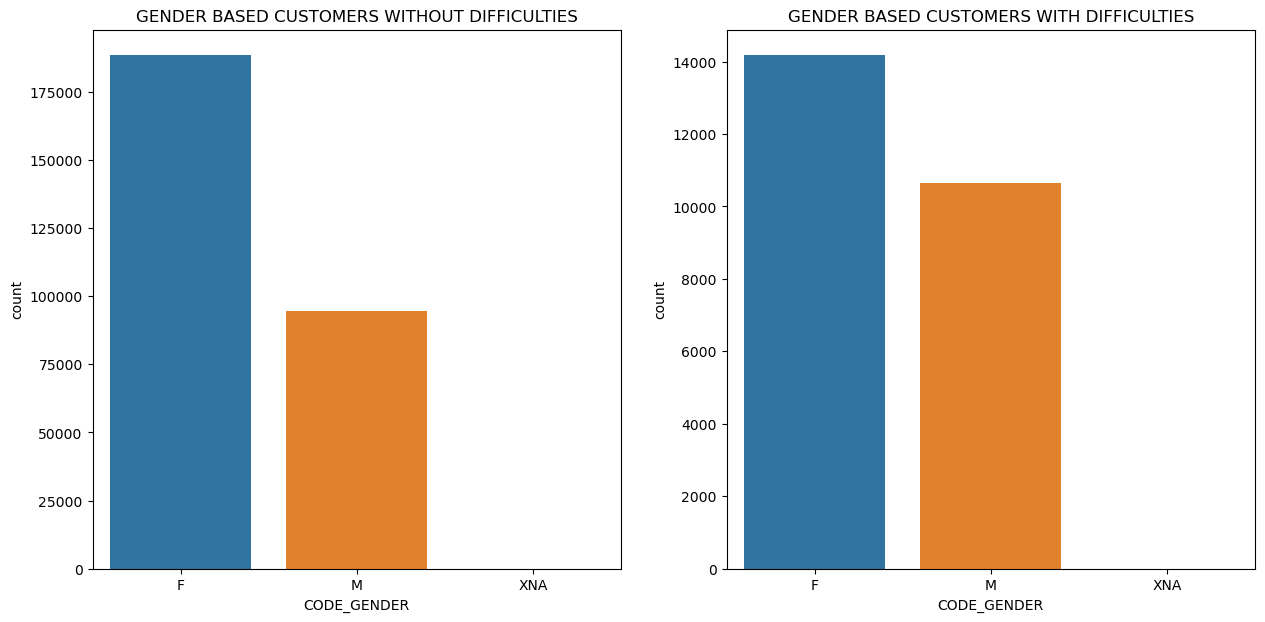

In [51]:
#Checking plot for 'CODE_GENDER' for both target variables 0 and 1

plt.figure(figsize =(15,7))

plt.subplot(1,2,1)
x = sns.countplot(df_target0['CODE_GENDER'])
plt.title('GENDER BASED CUSTOMERS WITHOUT DIFFICULTIES')

plt.subplot(1,2,2)
x = sns.countplot(df_target1['CODE_GENDER'])
plt.title('GENDER BASED CUSTOMERS WITH DIFFICULTIES')
plt.show()

#### Here we can clearly see that the female has a greater count than the male in both the cases.

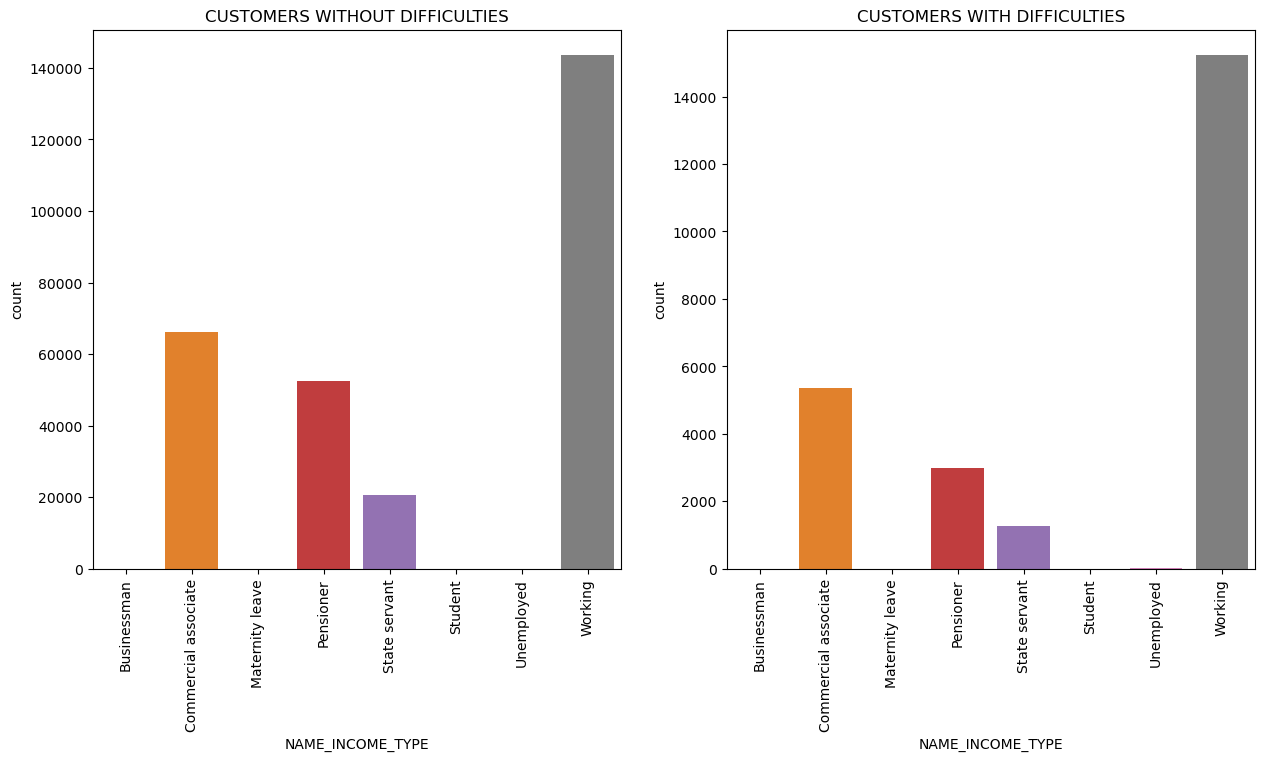

In [52]:
#Checking plot for 'NAME_INCOME_TYPE' for both target variables 0 and 1

plt.figure(figsize =(15,7))

plt.subplot(1,2,1)
x = sns.countplot(df_target0['NAME_INCOME_TYPE'])
plt.xticks(rotation = 90)
plt.title('CUSTOMERS WITHOUT DIFFICULTIES')

plt.subplot(1,2,2)
x = sns.countplot(df_target1['NAME_INCOME_TYPE'])
plt.xticks(rotation = 90)
plt.title('CUSTOMERS WITH DIFFICULTIES')
plt.show()

#### Here we can see that the working class has the most count and the graphs are almost same with the difficulity count for the other three categories being lower for target variable 1.

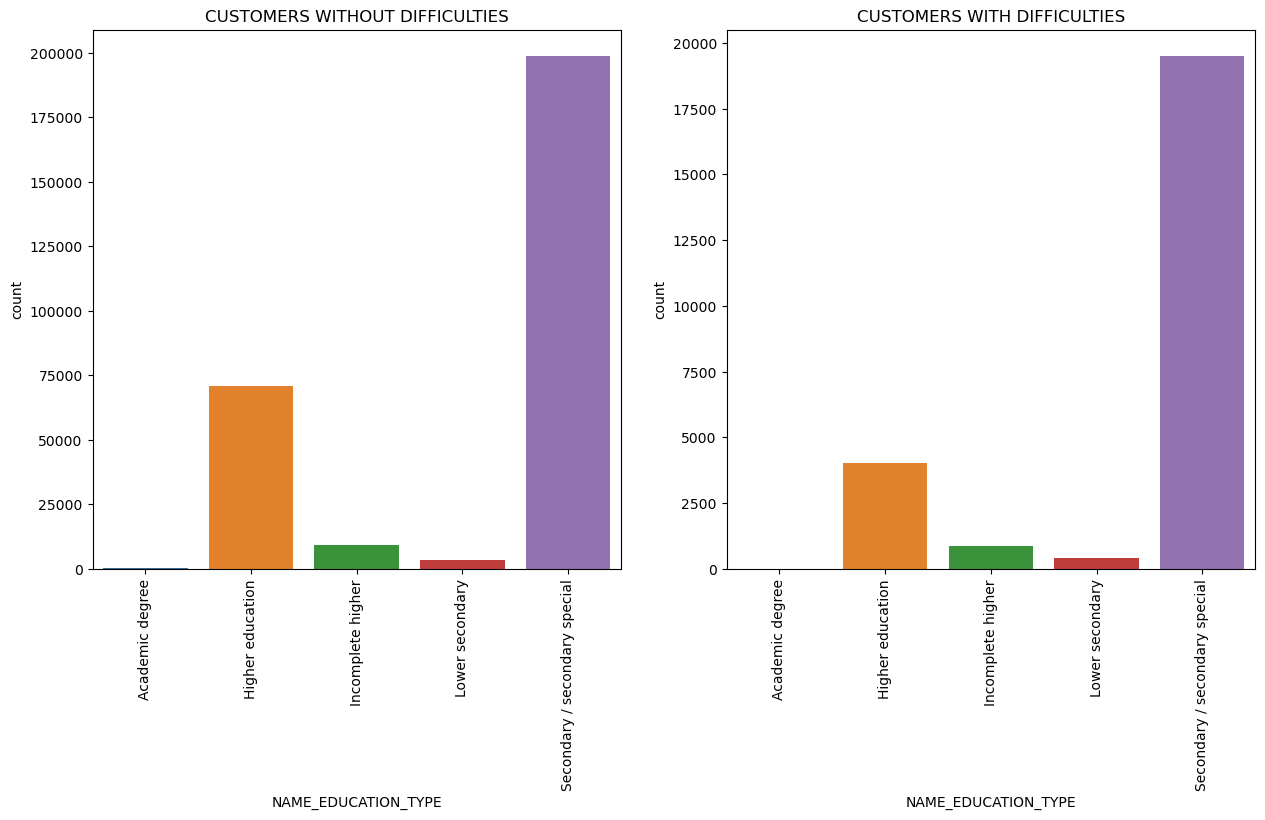

In [53]:
##Checking plot for 'NAME_EDUCATION_TYPE' for both target variables 0 and 1

plt.figure(figsize =(15,7))

plt.subplot(1,2,1)
x = sns.countplot(df_target0['NAME_EDUCATION_TYPE'])
plt.xticks(rotation = 90)
plt.title('CUSTOMERS WITHOUT DIFFICULTIES')

plt.subplot(1,2,2)
x = sns.countplot(df_target1['NAME_EDUCATION_TYPE'])
plt.xticks(rotation = 90)
plt.title('CUSTOMERS WITH DIFFICULTIES')
plt.show()

#### Here the most difficulties faced by the Secondary/Secondary Special and the graphs for both the target variable is same. 

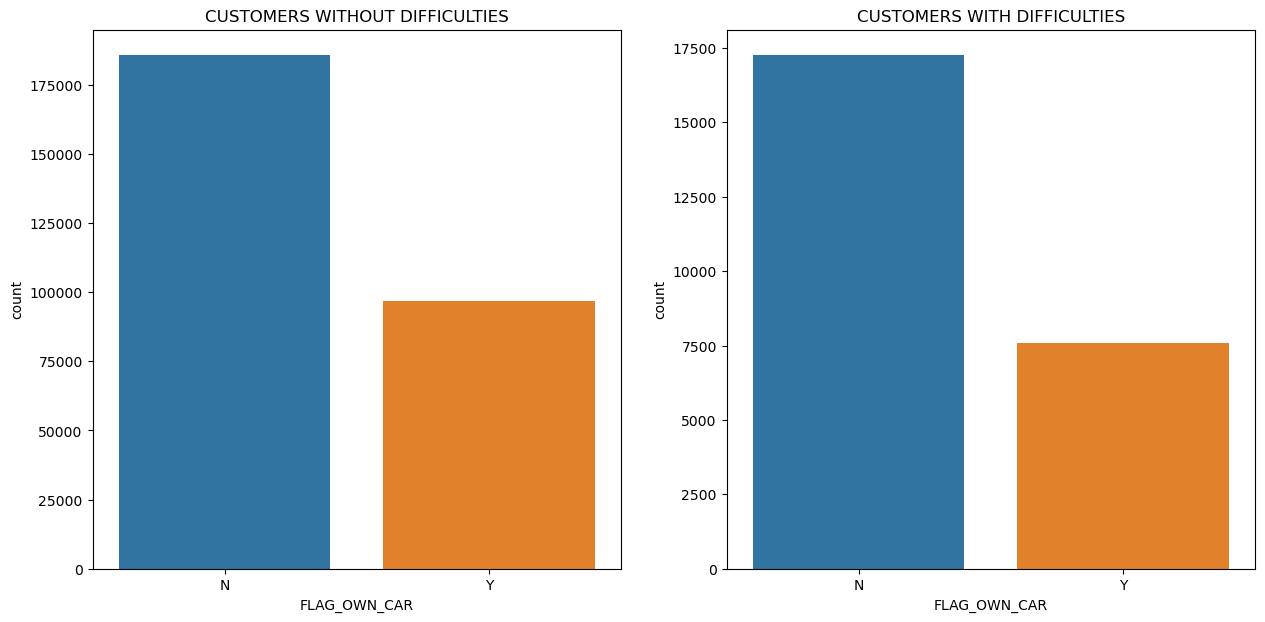

In [54]:
##Checking plot for 'FLAG_OWN_CAR' for both target variables 0 and 1

plt.figure(figsize =(15,7))

plt.subplot(1,2,1)
x = sns.countplot(df_target0['FLAG_OWN_CAR'])
plt.title('CUSTOMERS WITHOUT DIFFICULTIES')

plt.subplot(1,2,2)
x = sns.countplot(df_target1['FLAG_OWN_CAR'])
plt.title('CUSTOMERS WITH DIFFICULTIES')
plt.show()

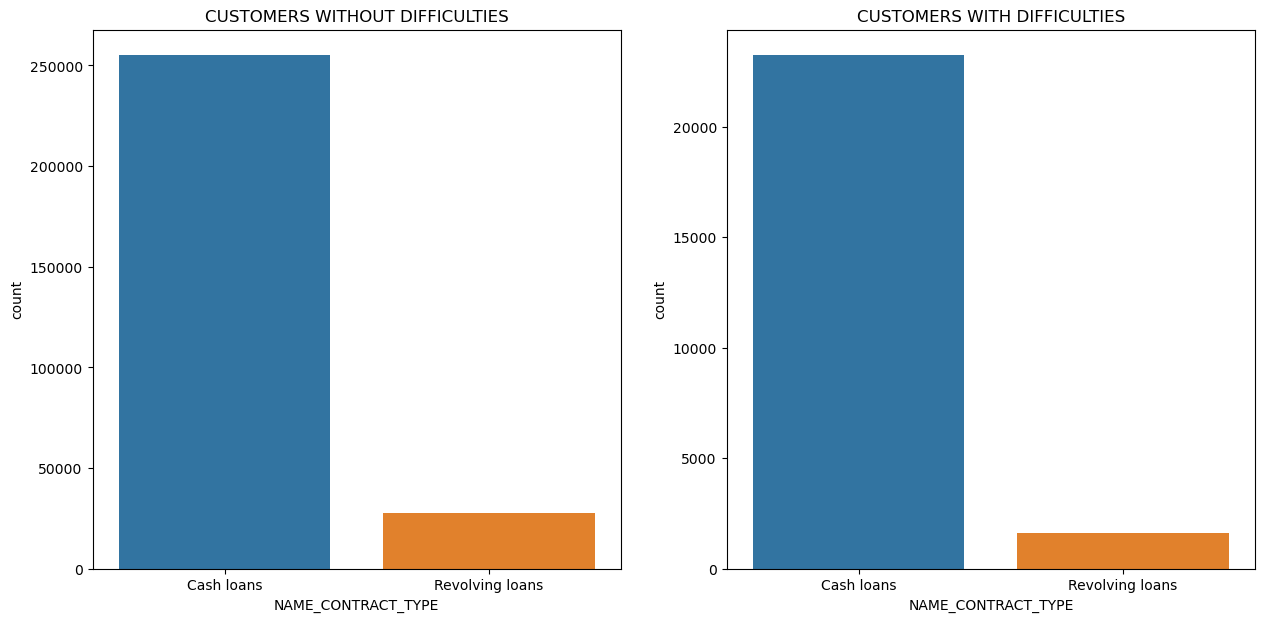

In [55]:
##Checking plot for 'NAME_CONTRACT_TYPE' for both target variables 0 and 1

plt.figure(figsize =(15,7))

plt.subplot(1,2,1)
x = sns.countplot(df_target0['NAME_CONTRACT_TYPE'])
plt.title('CUSTOMERS WITHOUT DIFFICULTIES')

plt.subplot(1,2,2)
x = sns.countplot(df_target1['NAME_CONTRACT_TYPE'])
plt.title('CUSTOMERS WITH DIFFICULTIES')
plt.show()

#### Here we see that the customers facing and not facing payment difficulties are  taking cash loans in both the cases.

### Now we will perform Bivariate Analysis on the Numerical Variables for both target variable 0 and 1

##### Numerical to numerical

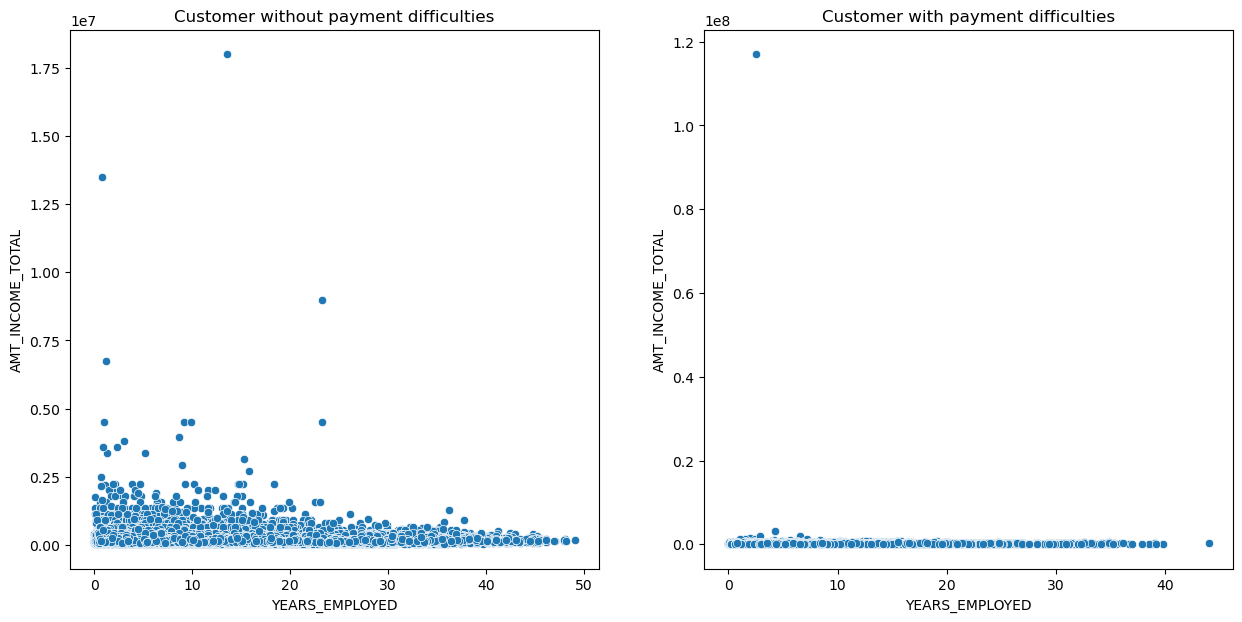

In [56]:
#Checking for the number of 'YEARS_EMPLOYED' to 'AMT_INCOME_TOTAL' for both target variable 0 and 1 

plt.figure(figsize=(15,7)) 

plt.subplot(1,2,1)
ax = sns.scatterplot(data=df_target0[df_target0['YEARS_EMPLOYED']<1000], x='YEARS_EMPLOYED',y='AMT_INCOME_TOTAL')
plt.title('Customer without payment difficulties')

plt.subplot(1,2,2)
ax = sns.scatterplot(data=df_target1[df_target1['YEARS_EMPLOYED']<1000], x='YEARS_EMPLOYED',y='AMT_INCOME_TOTAL')
plt.title('Customer with payment difficulties')
plt.show()

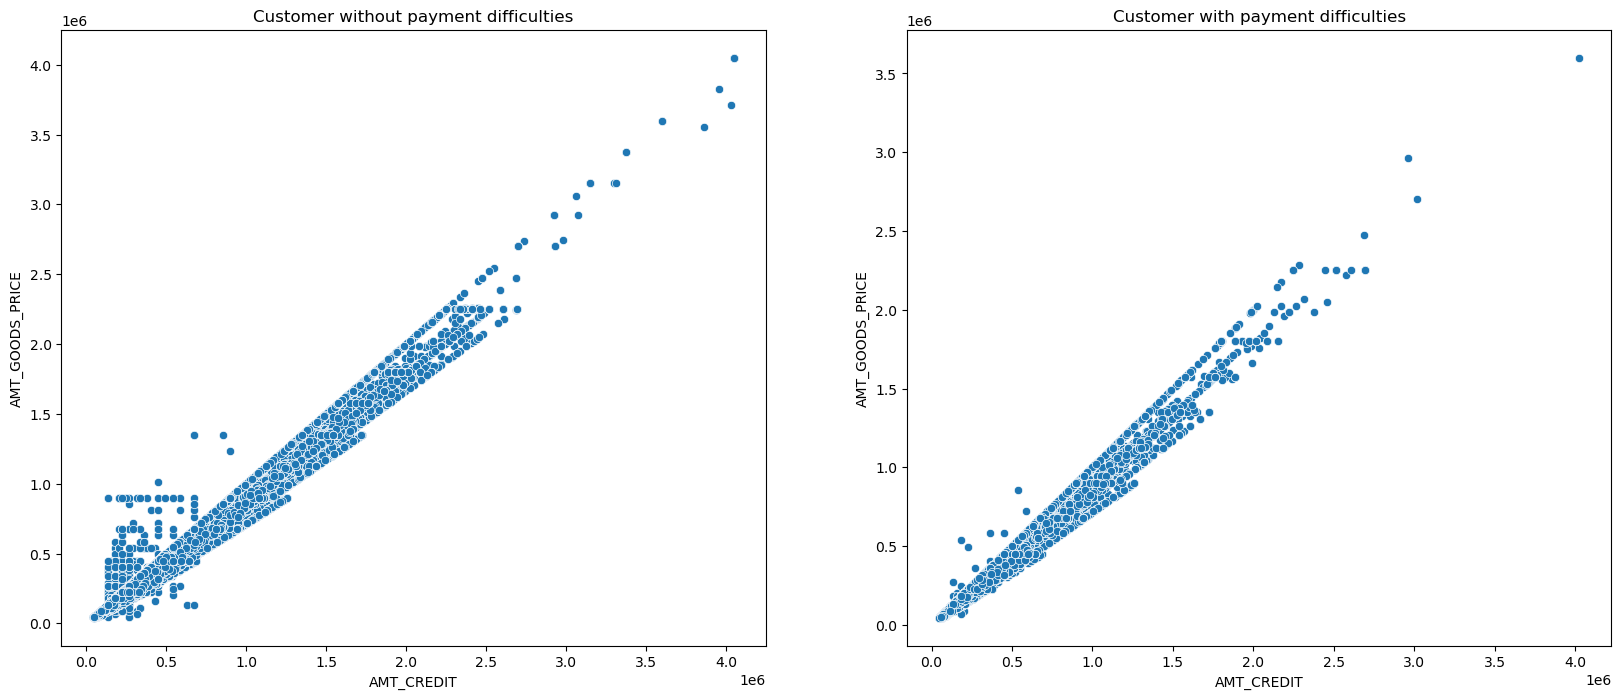

In [57]:
#Checking for the number of 'AMT_CREDIT' to 'AMT_GOODS_PRICE' for both target variable 0 and 1

plt.figure(figsize=(20,8)) 

plt.subplot(1,2,1)
ax = sns.scatterplot(data=df_target0,x='AMT_CREDIT',y='AMT_GOODS_PRICE')
plt.title('Customer without payment difficulties')


plt.subplot(1,2,2)
ax = sns.scatterplot(data=df_target1,x='AMT_CREDIT',y='AMT_GOODS_PRICE')
plt.title('Customer with payment difficulties')

plt.show()

#### Here we can see that the AMT_GOODS_PRICE is positively related to AMT_CREDIT 

##### Categorical to categorical

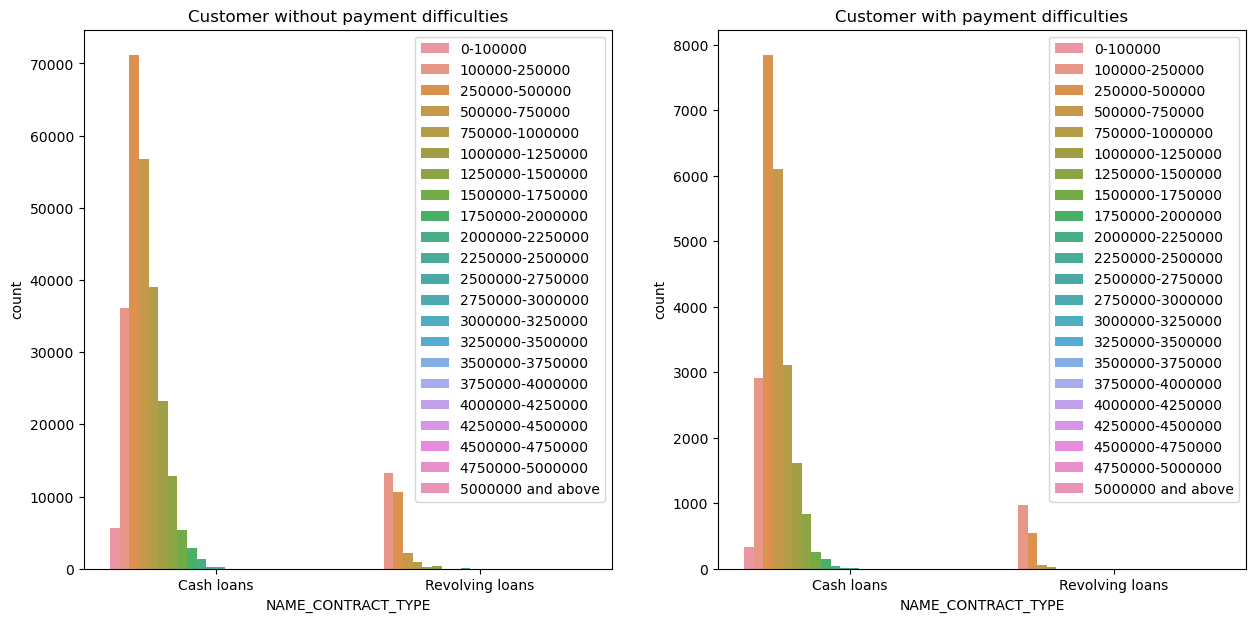

In [58]:

plt.figure(figsize=(15,7)) 

plt.subplot(1,2,1)
ax = sns.countplot(data=df_target0,x='NAME_CONTRACT_TYPE',hue='CREDIT_RANGE')
plt.title('Customer without payment difficulties')
plt.legend(loc='upper right')


plt.subplot(1,2,2)
ax = sns.countplot(data=df_target1,x='NAME_CONTRACT_TYPE',hue='CREDIT_RANGE')
plt.title('Customer with payment difficulties')
plt.legend(loc='upper right')
plt.show()

#### Here we see that male taking Cash Loans are facing more difficulties with payment. 

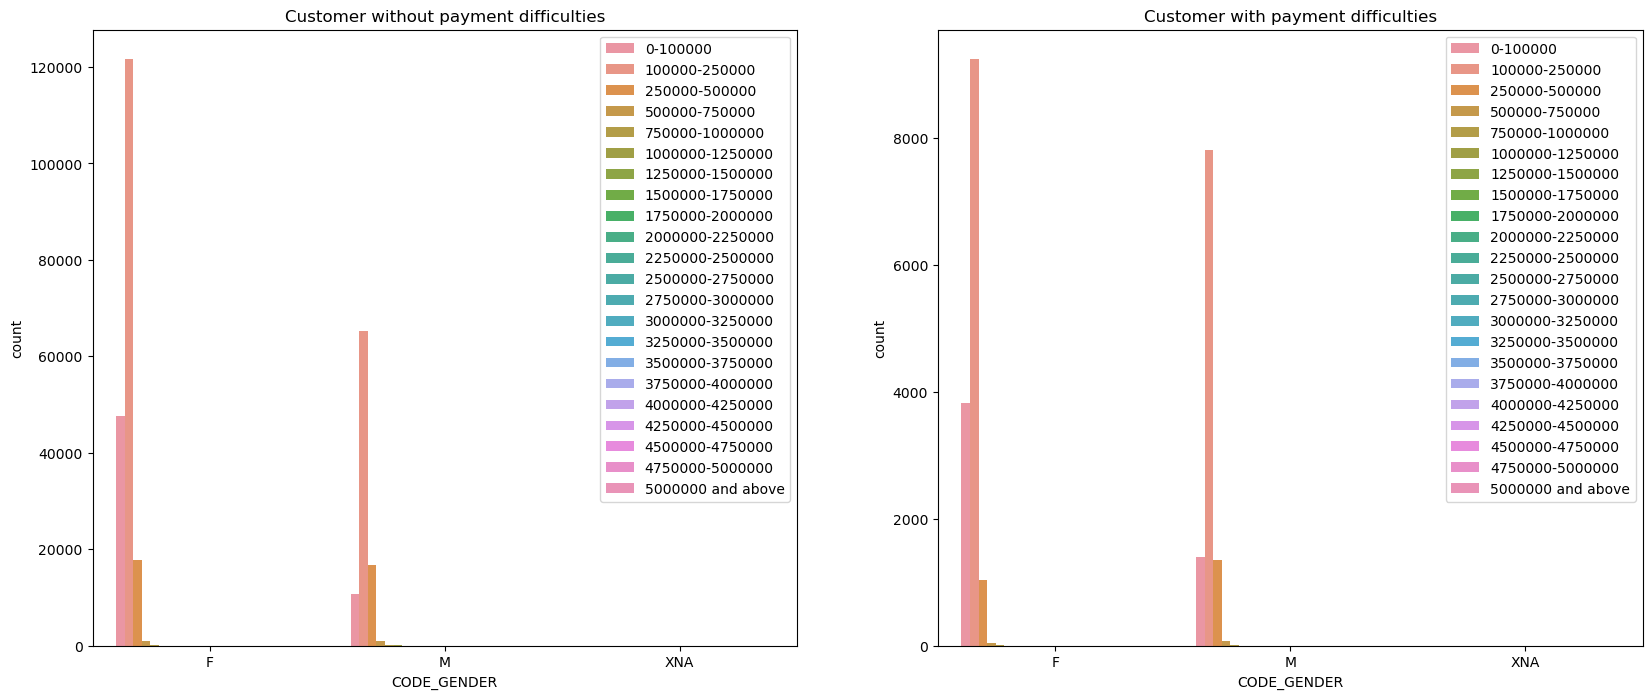

In [59]:
plt.figure(figsize=(20,8)) 

plt.subplot(1,2,1)
ax = sns.countplot(data=df_target0,x='CODE_GENDER',hue='INCOME_RANGE')
plt.title('Customer without payment difficulties')
plt.legend(loc='upper right')


plt.subplot(1,2,2)
ax = sns.countplot(data=df_target1,x='CODE_GENDER',hue='INCOME_RANGE')
plt.title('Customer with payment difficulties')
plt.legend(loc='upper right')
plt.show()

##### Categorical to Numerical

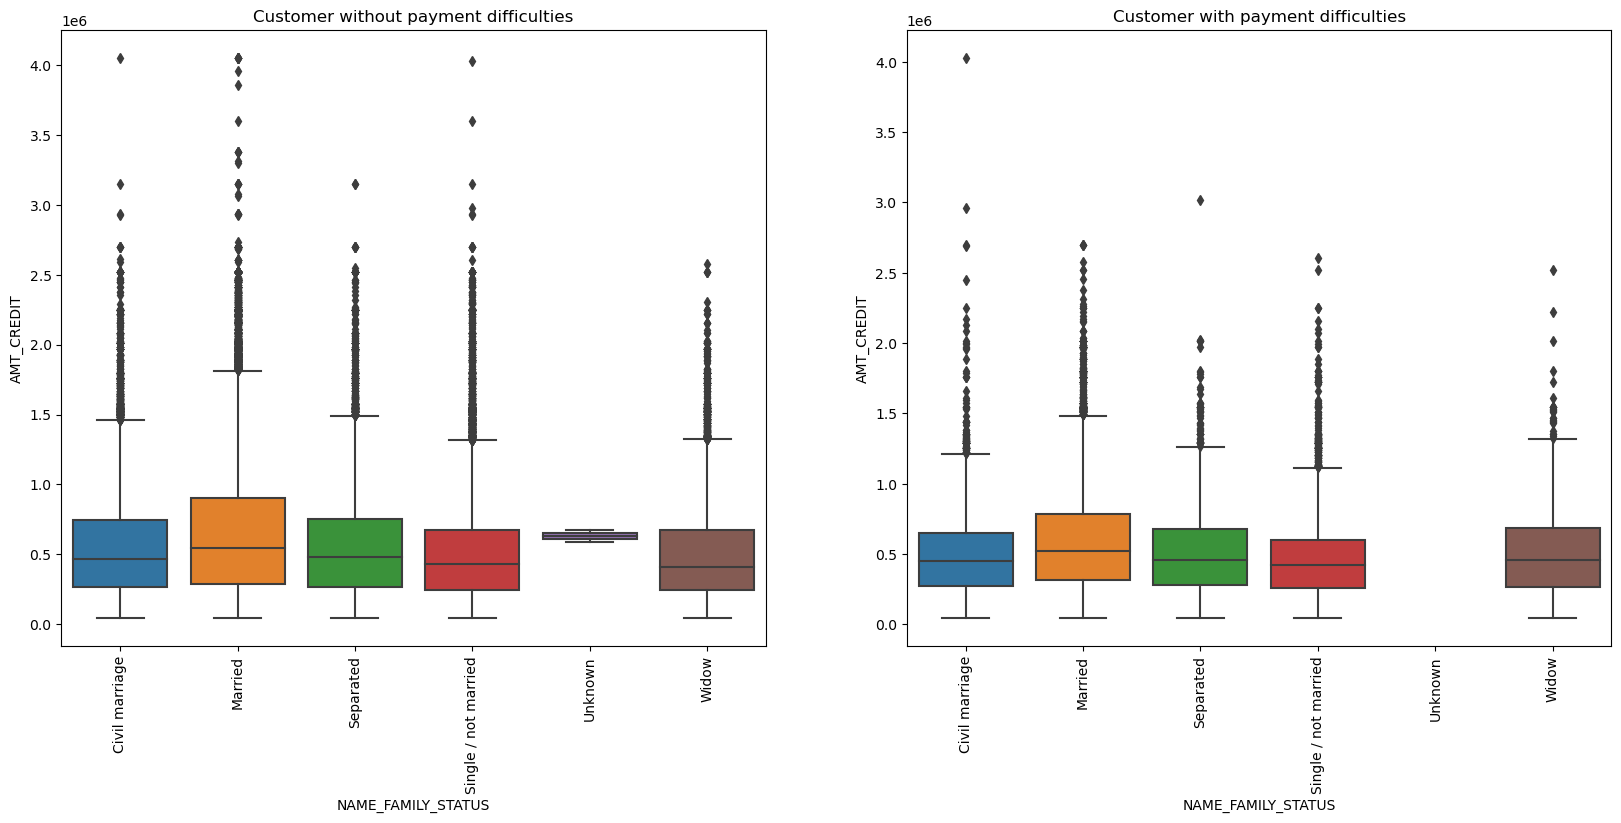

In [60]:
plt.figure(figsize=(20,8)) 

plt.subplot(1,2,1)
ax = sns.boxplot(data=df_target0,y='AMT_CREDIT',x='NAME_FAMILY_STATUS')
plt.title('Customer without payment difficulties')
plt.xticks(rotation=90)

plt.subplot(1,2,2)
ax = sns.boxplot(data=df_target1,y='AMT_CREDIT',x='NAME_FAMILY_STATUS')
plt.title('Customer with payment difficulties')
plt.xticks(rotation=90)
plt.show()

#### Here we see that unknown family status doesn't have any difficulty in payment and the rest of the group is almost same.

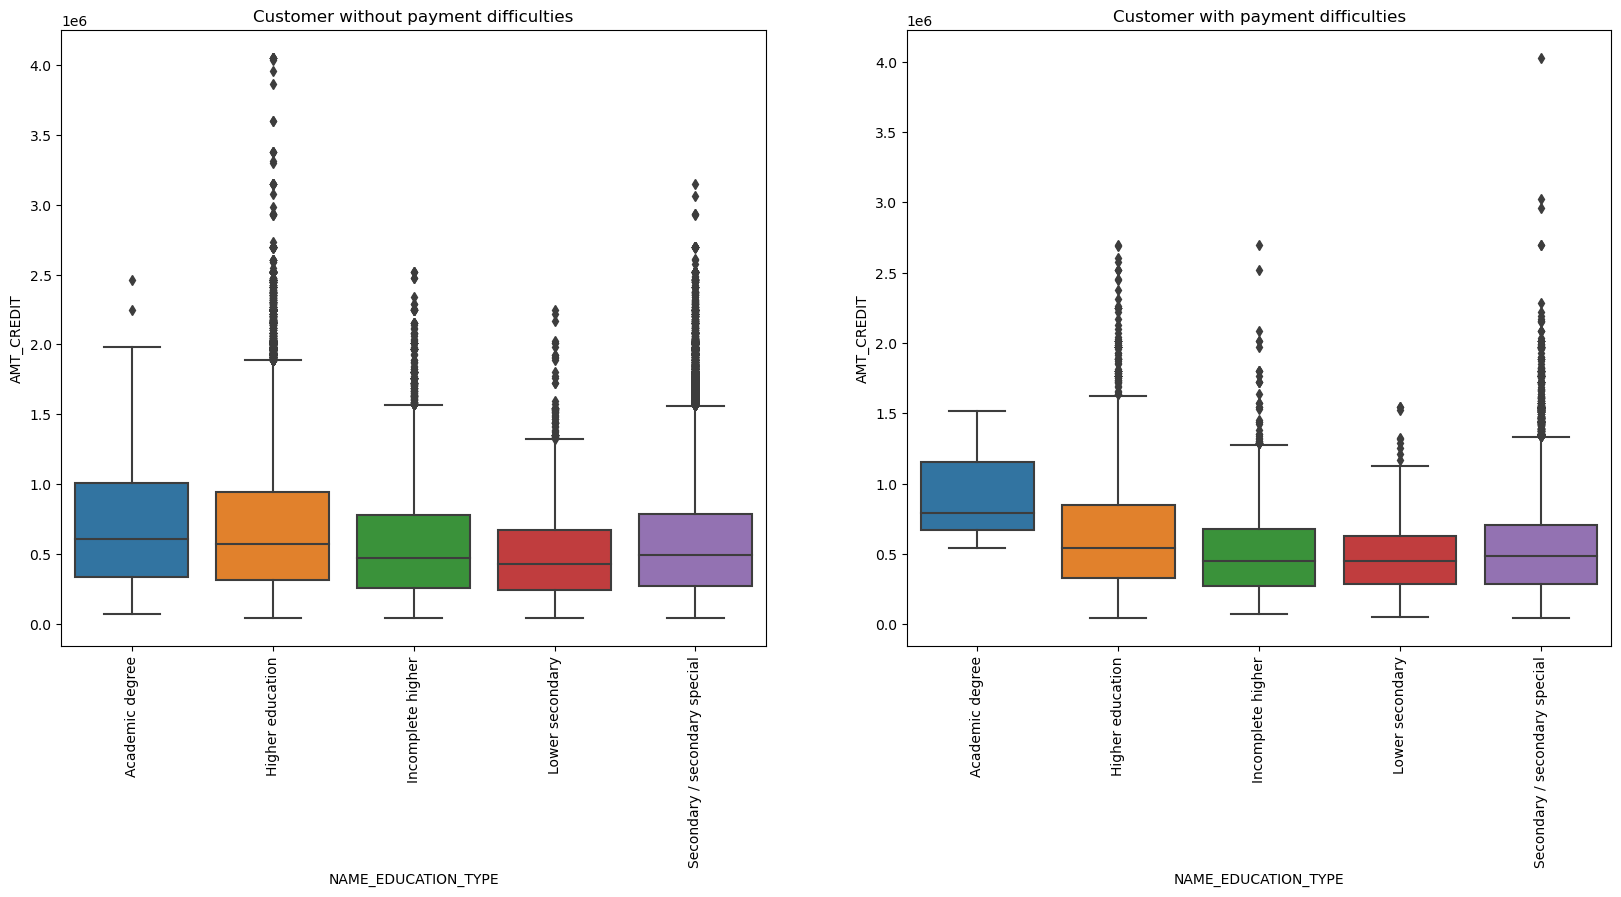

In [61]:
plt.figure(figsize=(20,8)) 

plt.subplot(1,2,1)
ax = sns.boxplot(data=df_target0[df_target0['AMT_CREDIT']<5000000],y='AMT_CREDIT',x='NAME_EDUCATION_TYPE')
plt.title('Customer without payment difficulties')
plt.xticks(rotation=90)

plt.subplot(1,2,2)
ax = sns.boxplot(data=df_target1[df_target1['AMT_CREDIT']<5000000],y='AMT_CREDIT',x='NAME_EDUCATION_TYPE')
plt.title('Customer with payment difficulties')
plt.xticks(rotation=90)
plt.show()

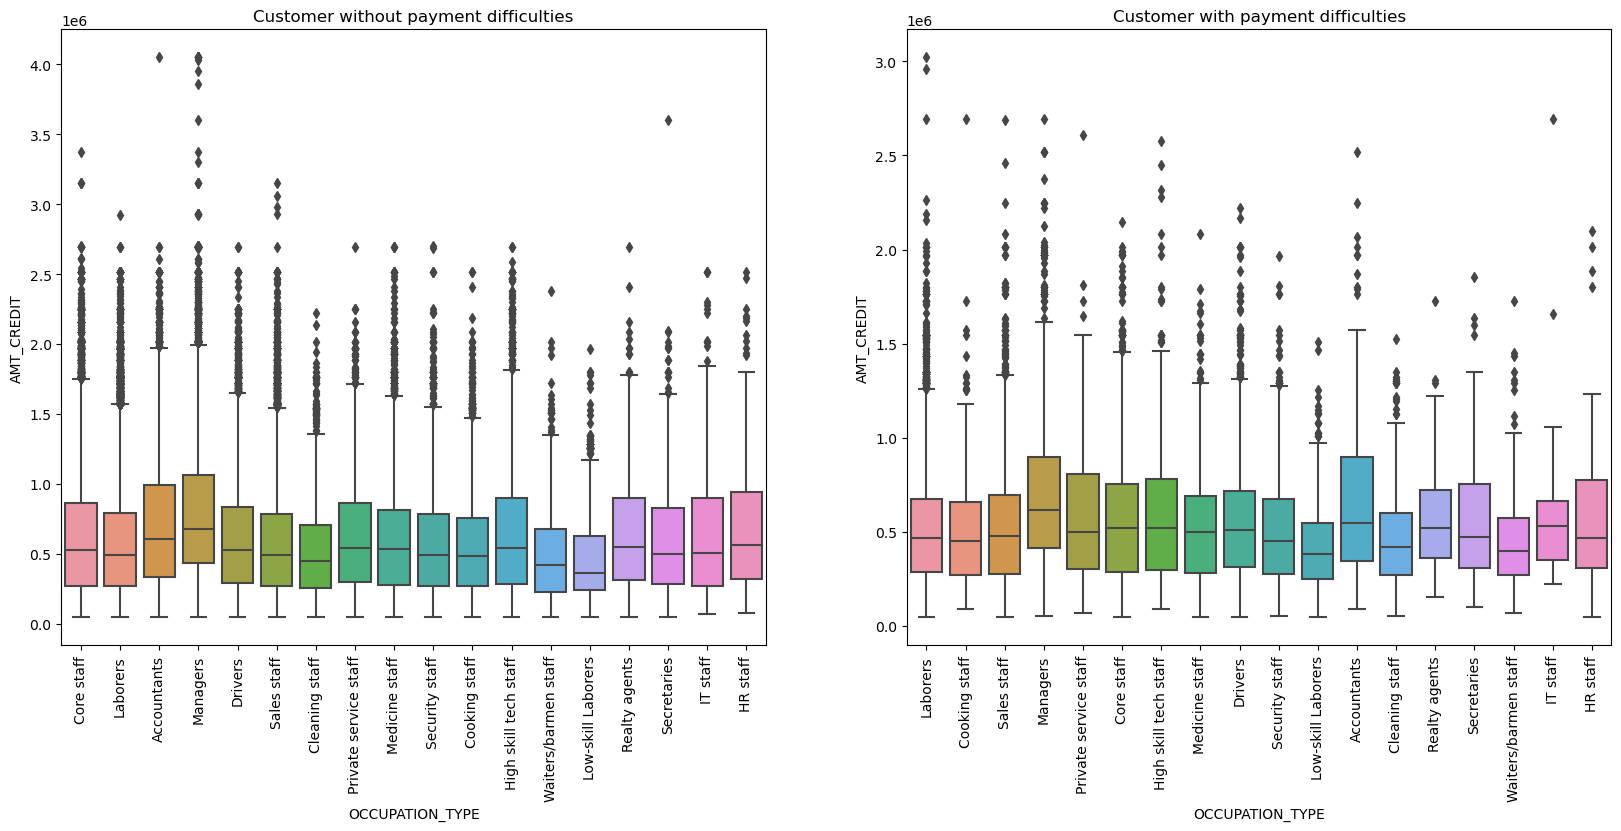

In [62]:
plt.figure(figsize=(20,8)) 

plt.subplot(1,2,1)
ax = sns.boxplot(data=df_target0[df_target0['AMT_CREDIT']<5000000],y='AMT_CREDIT',x='OCCUPATION_TYPE')
plt.title('Customer without payment difficulties')
plt.xticks(rotation=90)

plt.subplot(1,2,2)
ax = sns.boxplot(data=df_target1[df_target1['AMT_CREDIT']<5000000],y='AMT_CREDIT',x='OCCUPATION_TYPE')
plt.title('Customer with payment difficulties')
plt.xticks(rotation=90)
plt.show()

#### We can see that the category with Academic degree has more payment difficulties than the rest of the categories.

## Merging the df dataframe with the pre_df  

In [63]:
#Reading the 'previous application file' to pre_df

pre_df = pd.read_csv('previous_application.csv')

In [64]:
pre_df                  #Checking the shape of the dataframe

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1670209,2300464,352015,Consumer loans,14704.290,267295.5,311400.0,0.0,267295.5,WEDNESDAY,12,...,Furniture,30.0,low_normal,POS industry with interest,365243.0,-508.0,362.0,-358.0,-351.0,0.0
1670210,2357031,334635,Consumer loans,6622.020,87750.0,64291.5,29250.0,87750.0,TUESDAY,15,...,Furniture,12.0,middle,POS industry with interest,365243.0,-1604.0,-1274.0,-1304.0,-1297.0,0.0
1670211,2659632,249544,Consumer loans,11520.855,105237.0,102523.5,10525.5,105237.0,MONDAY,12,...,Consumer electronics,10.0,low_normal,POS household with interest,365243.0,-1457.0,-1187.0,-1187.0,-1181.0,0.0
1670212,2785582,400317,Cash loans,18821.520,180000.0,191880.0,NaN,180000.0,WEDNESDAY,9,...,XNA,12.0,low_normal,Cash X-Sell: low,365243.0,-1155.0,-825.0,-825.0,-817.0,1.0


In [65]:
#Checking the dtypes and other info about the file

pre_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [66]:
#Merging the df with pre_df

complete_df = pd.merge(left=df, right=pre_df,how='inner', on='SK_ID_CURR',suffixes='_x')

In [67]:
#Checking the shape of this new dataframe

complete_df.shape

(1413701, 80)

In [68]:
#Checking the data of complete_df

complete_df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_,AMT_ANNUITY_,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,Auto technology,24.0,low_normal,POS other with interest,365243.0,-565.0,125.0,-25.0,-17.0,0.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,XNA,12.0,low_normal,Cash X-Sell: low,365243.0,-716.0,-386.0,-536.0,-527.0,1.0
2,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,Furniture,6.0,middle,POS industry with interest,365243.0,-797.0,-647.0,-647.0,-639.0,0.0
3,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,Consumer electronics,12.0,middle,POS household with interest,365243.0,-2310.0,-1980.0,-1980.0,-1976.0,1.0
4,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,Connectivity,4.0,middle,POS mobile without interest,365243.0,-784.0,-694.0,-724.0,-714.0,0.0


In [69]:
#Checking the  percentages of the different 'NAME_CONTRACT_STATUS' 

complete_df['NAME_CONTRACT_STATUS'].value_counts()*100/len(complete_df)

Approved        62.679378
Canceled        18.351900
Refused         17.357984
Unused offer     1.610737
Name: NAME_CONTRACT_STATUS, dtype: float64

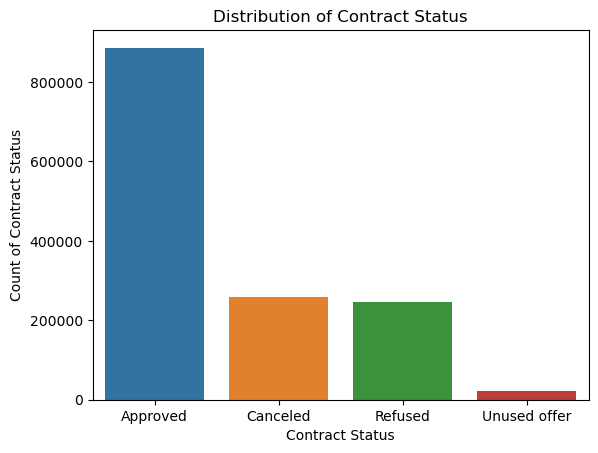

In [70]:
sns.countplot(complete_df['NAME_CONTRACT_STATUS'])
plt.xlabel("Contract Status")
plt.ylabel("Count of Contract Status")
plt.title("Distribution of Contract Status")
plt.show()

### We can divide the complete_df into four different categories based on the status of the column 'NAME_CONTRACT_STATUS' and then analyse further.

In [71]:
#Dividing into 4 different dataframes

approved_df = complete_df[complete_df['NAME_CONTRACT_STATUS']== 'Approved']
refused_df = complete_df[complete_df['NAME_CONTRACT_STATUS']== 'Refused']
cancelled_df = complete_df[complete_df['NAME_CONTRACT_STATUS']== 'Canceled']
unused_df = complete_df[complete_df['NAME_CONTRACT_STATUS']== 'Unused offer']

#### Now we will check with other variables based on this as how they are related and gain insights

In [72]:
#We can check which type of loan is mostly approved by checking the graphs on column'NAME_CONTRACT_TYPE'

complete_df['NAME_CONTRACT_TYPEx'].value_counts()

Cash loans         626764
Consumer loans     625256
Revolving loans    161368
XNA                   313
Name: NAME_CONTRACT_TYPEx, dtype: int64

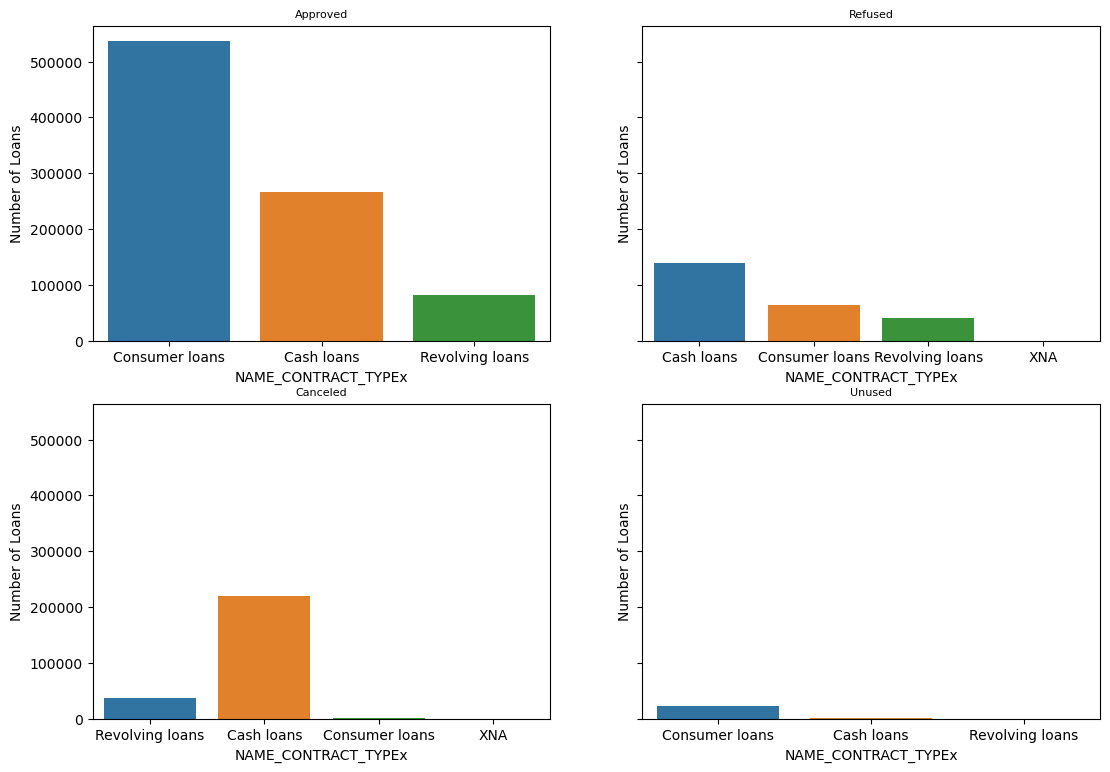

In [77]:
# We can plot this to check the type of contract being approved or rejected or cancelled or unused

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2,ncols=2, figsize=(13,9),sharey=True)

ax1 = sns.countplot(ax=ax1,data=approved_df,x='NAME_CONTRACT_TYPEx')
ax1.set_title("Approved", fontsize=8)
ax1.set_xlabel('NAME_CONTRACT_TYPEx')
ax1.set_ylabel("Number of Loans")


ax2 = sns.countplot(ax=ax2,data=refused_df,x='NAME_CONTRACT_TYPEx')
ax2.set_title("Refused", fontsize=8)
ax2.set_xlabel('NAME_CONTRACT_TYPEx')
ax2.set_ylabel("Number of Loans")


ax3 = sns.countplot(ax=ax3,data=cancelled_df,x='NAME_CONTRACT_TYPEx')
ax3.set_title("Canceled", fontsize=8)
ax3.set_xlabel('NAME_CONTRACT_TYPEx')
ax3.set_ylabel("Number of Loans")


ax4 = sns.countplot(ax=ax4,data=unused_df,x='NAME_CONTRACT_TYPEx')
ax4.set_title("Unused", fontsize=8)
ax4.set_xlabel('NAME_CONTRACT_TYPEx')
ax4.set_ylabel("Number of Loans")

plt.show()

#### Here we can see that Consumer Loans are being approved the most whereas the chances of cancelation is more for Cash Loans.

### We can create a function to plot these graphs for different columns so that we can generalise the above written code and create a function.

In [81]:
def plotting(variable_name):
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2,ncols=2, figsize=(16,12), sharey='all')
    fig.tight_layout(pad=10.0)

    ax1 = sns.countplot(ax=ax1,data=approved_df,x=variable_name)
    ax1.set_title("Approved", fontsize=10)
    ax1.set_ylabel("Number of Loans")
    ax1.set_xticklabels(ax1.get_xticklabels(),rotation=90)

    ax2 = sns.countplot(ax=ax2,data=refused_df,x=variable_name)
    ax2.set_title("Refused", fontsize=10)
    ax2.set_ylabel("Number of Loans")
    ax2.set_xticklabels(ax2.get_xticklabels(),rotation=90)

    ax3 = sns.countplot(ax=ax3,data=cancelled_df,x=variable_name)
    ax3.set_title("Canceled", fontsize=10)
    ax3.set_xlabel(variable_name)
    ax3.set_ylabel("Number of Loans")
    ax3.set_xticklabels(ax3.get_xticklabels(),rotation=90)

    ax4 = sns.countplot(ax=ax4,data=unused_df,x=variable_name)
    ax4.set_title("Unused", fontsize=10)
    ax4.set_xlabel(variable_name)
    ax4.set_ylabel("Number of Loans")
    ax4.set_xticklabels(ax4.get_xticklabels(),rotation=90)
    
    plt.show()

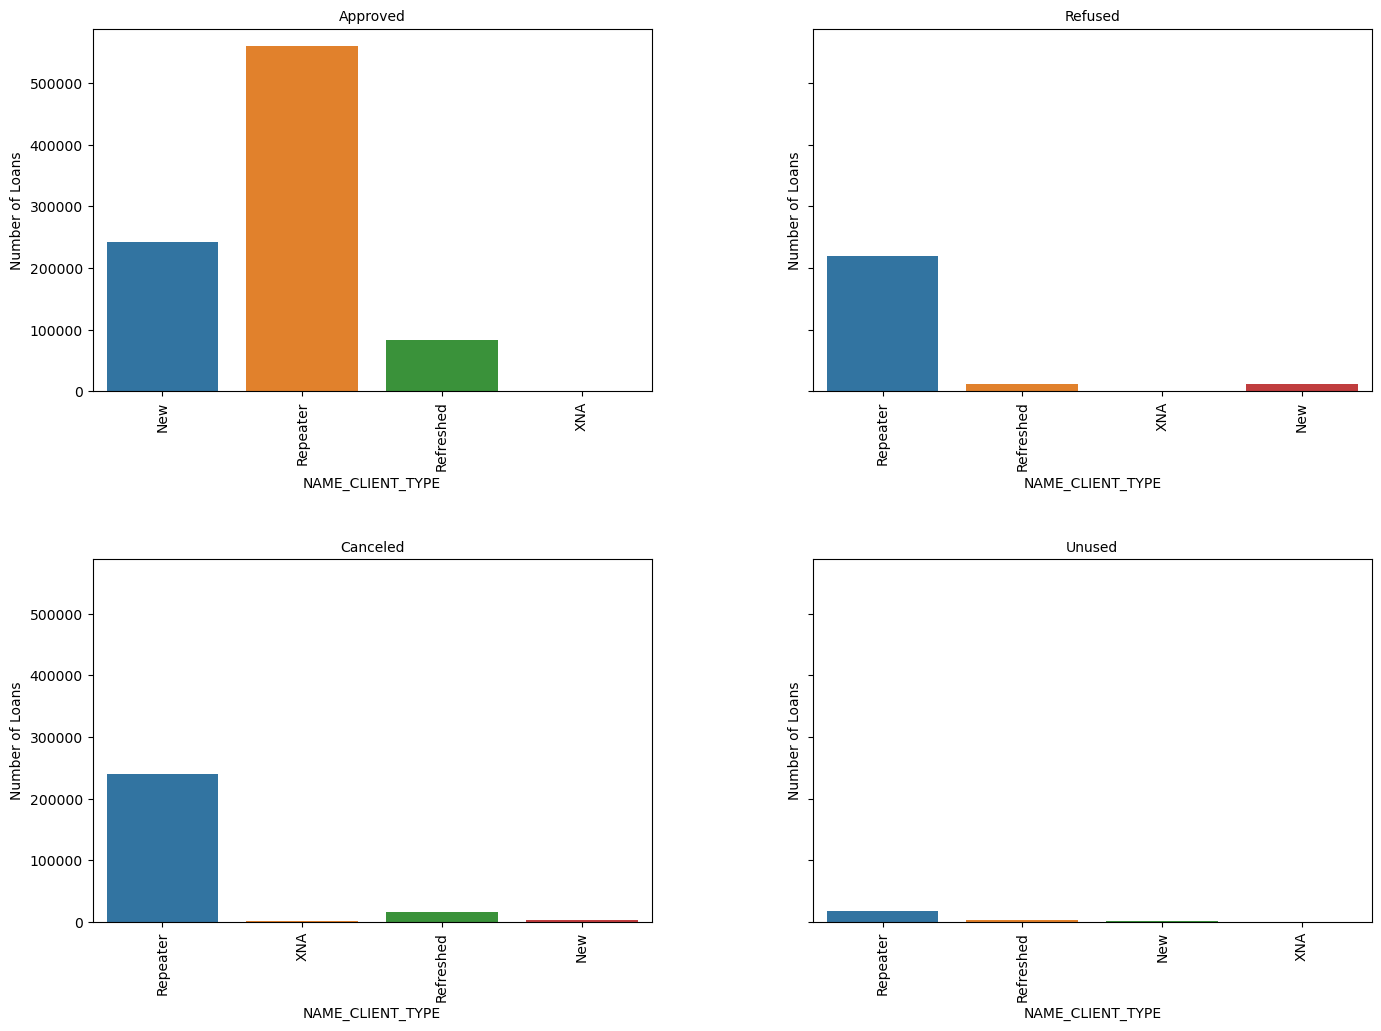

In [82]:
plotting('NAME_CLIENT_TYPE')

#### Here we can see that the repeaters are being approved , refused and cancelled more.

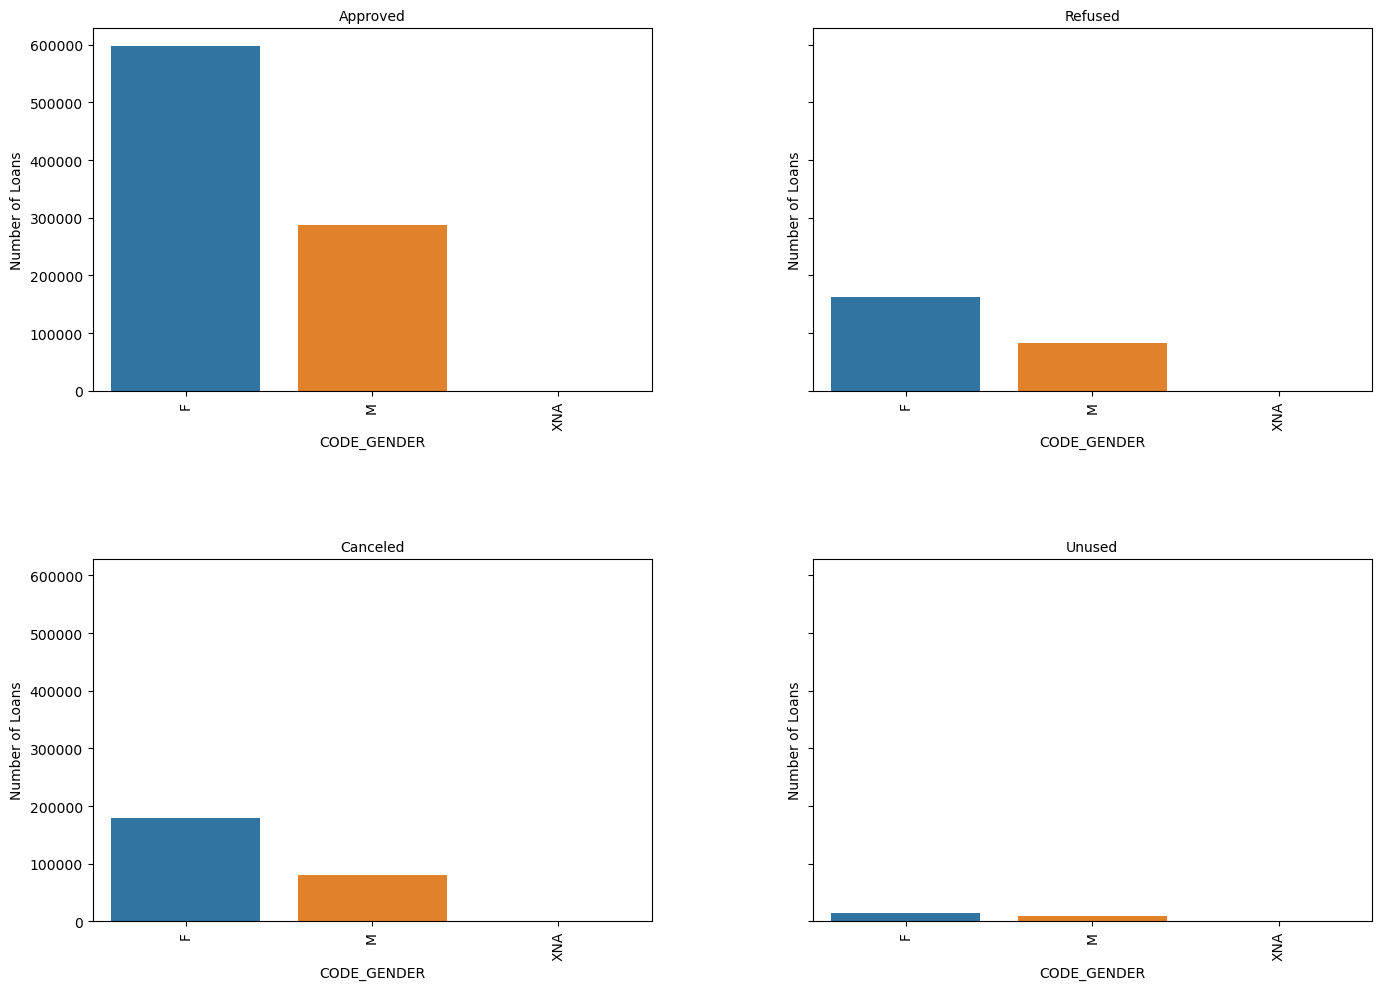

In [83]:
plotting('CODE_GENDER')

#### Here also we can see that the Female are being more approved and refused and cancelled loans. 

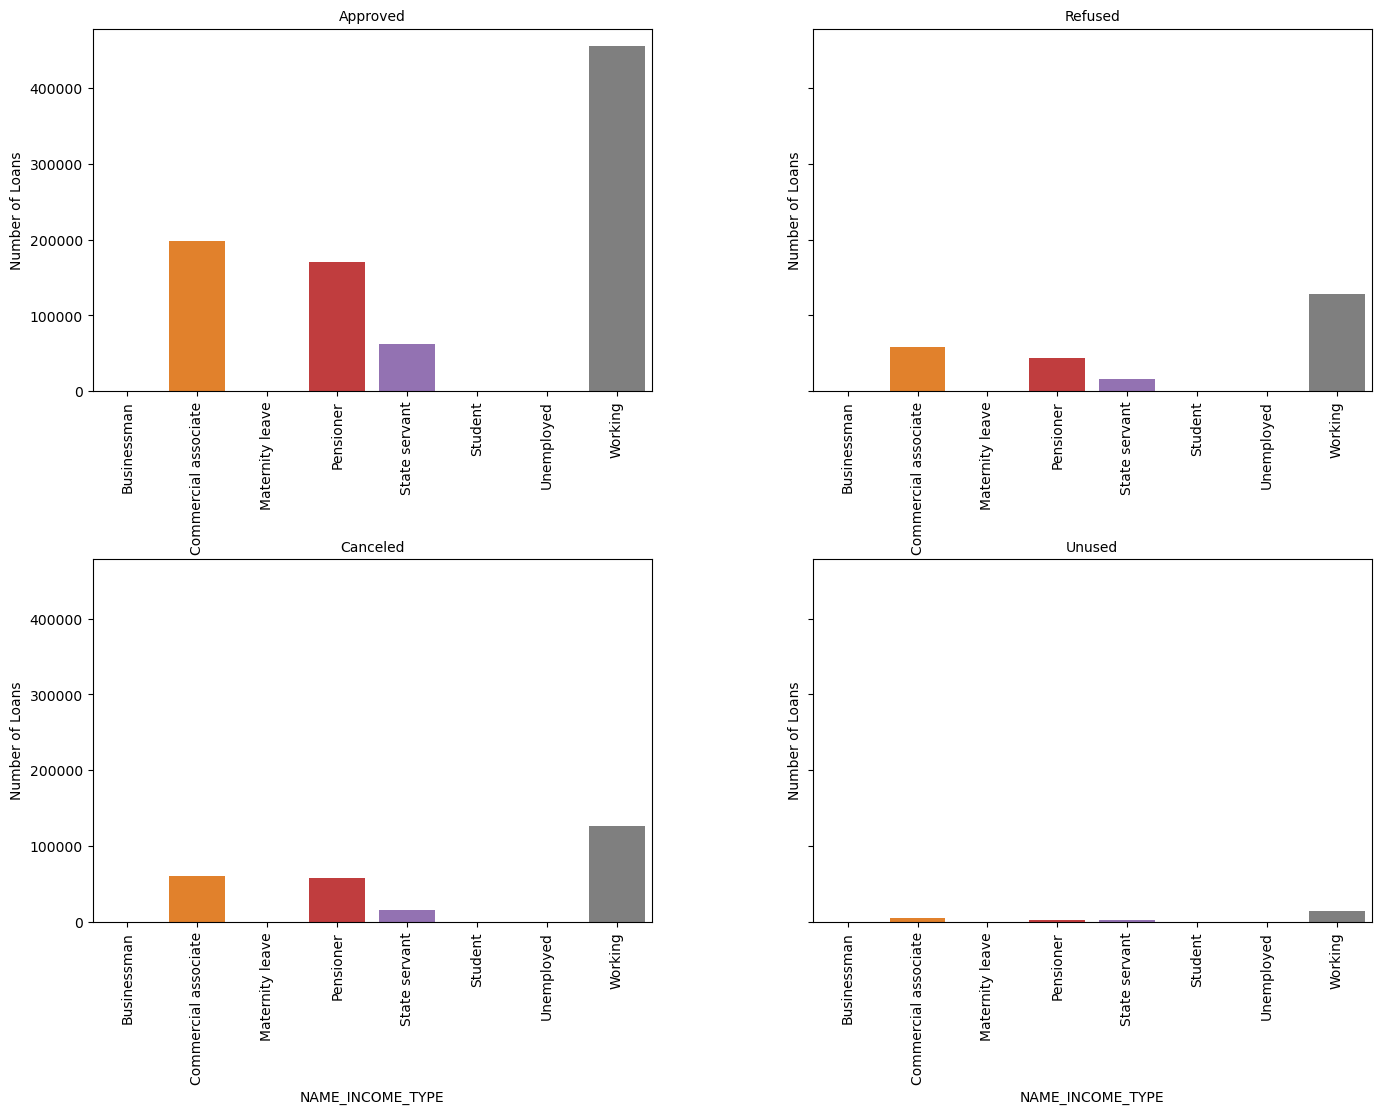

In [84]:
plotting('NAME_INCOME_TYPE')

#### Here Working and Commercial Associates are applying more loans and also getting approved. 

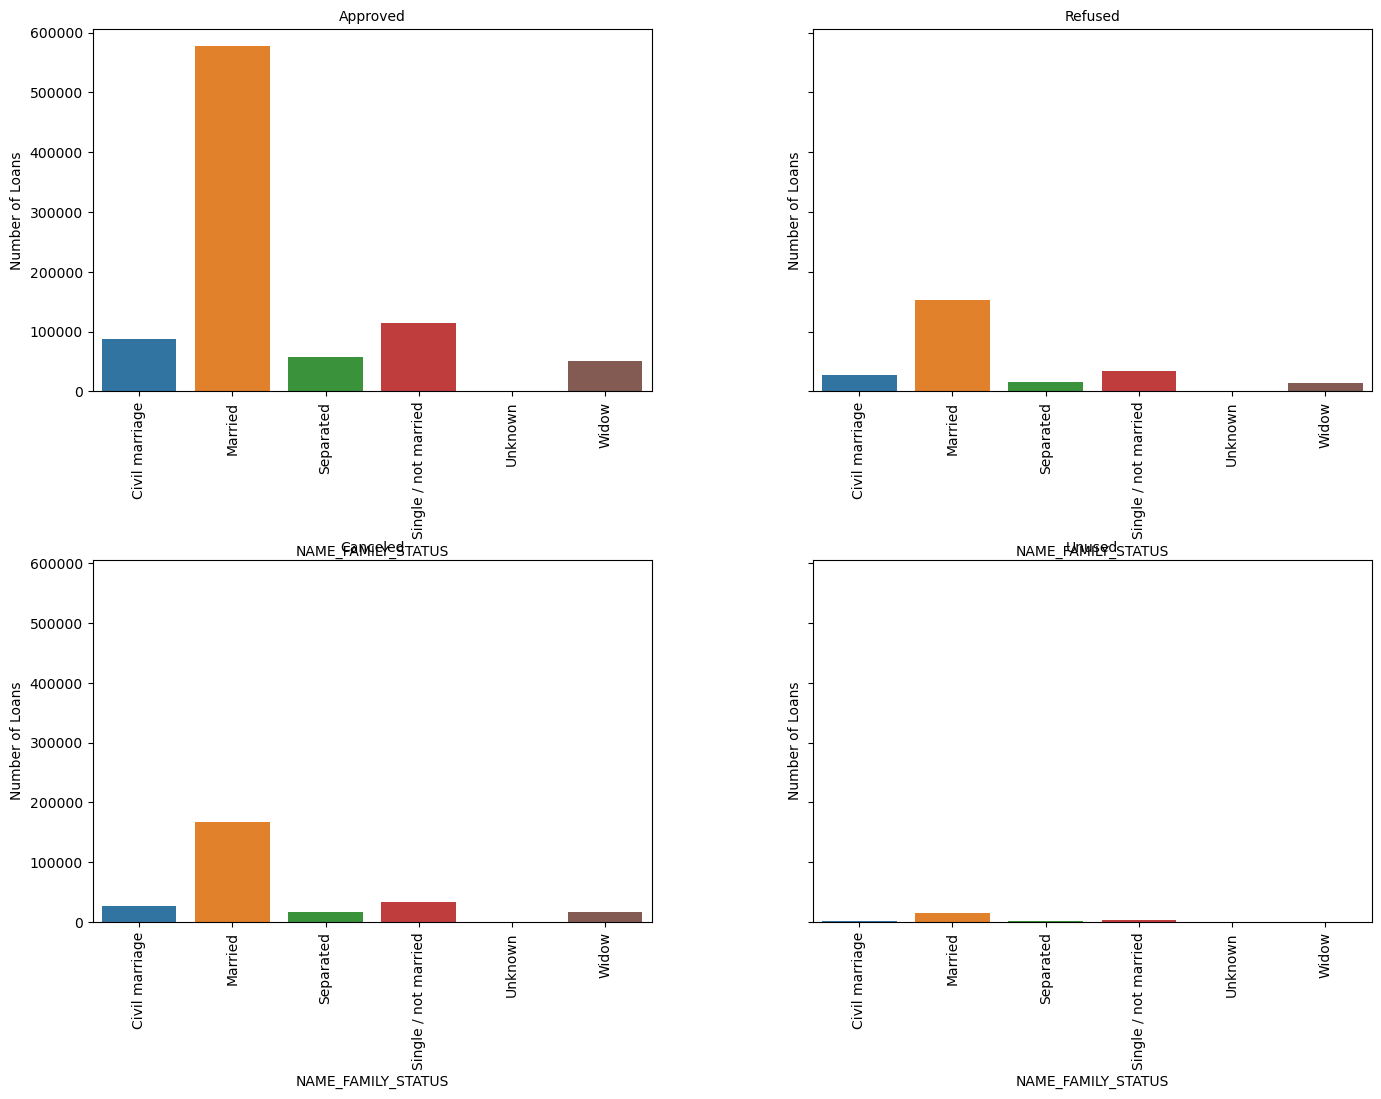

In [85]:
plotting('NAME_FAMILY_STATUS')

#### Here the married is applying for more loans and also being approved more.

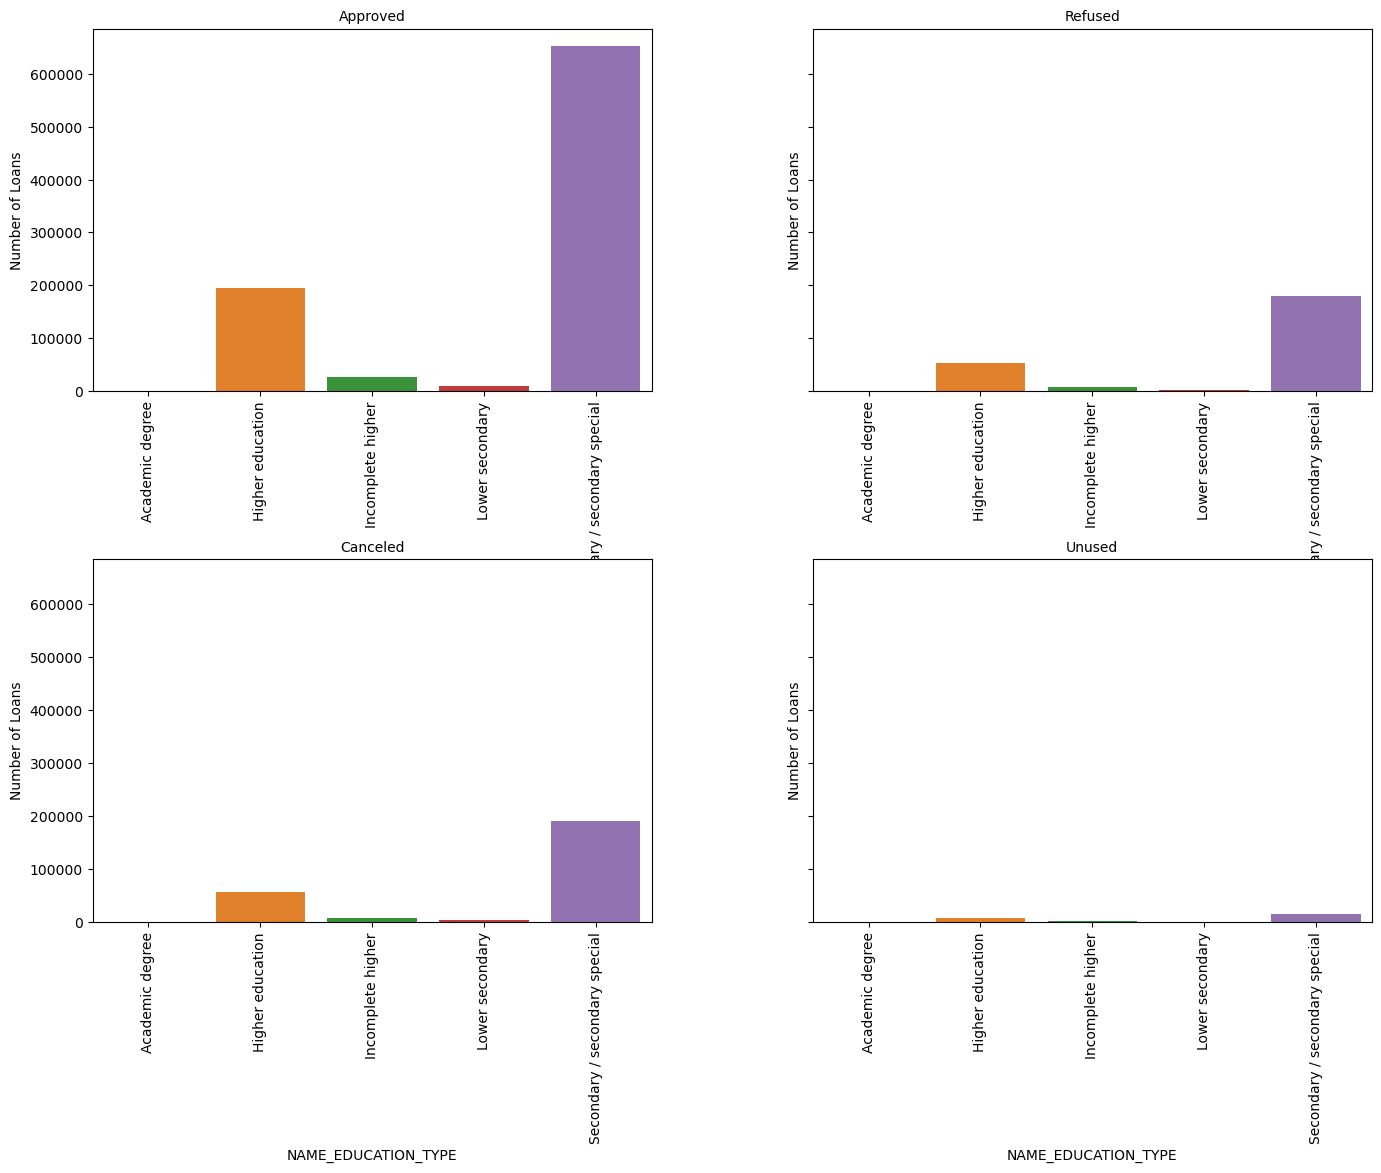

In [86]:
plotting('NAME_EDUCATION_TYPE')

#### Here the Secondary/Secondary special category is applying for the most loans and also being approved.

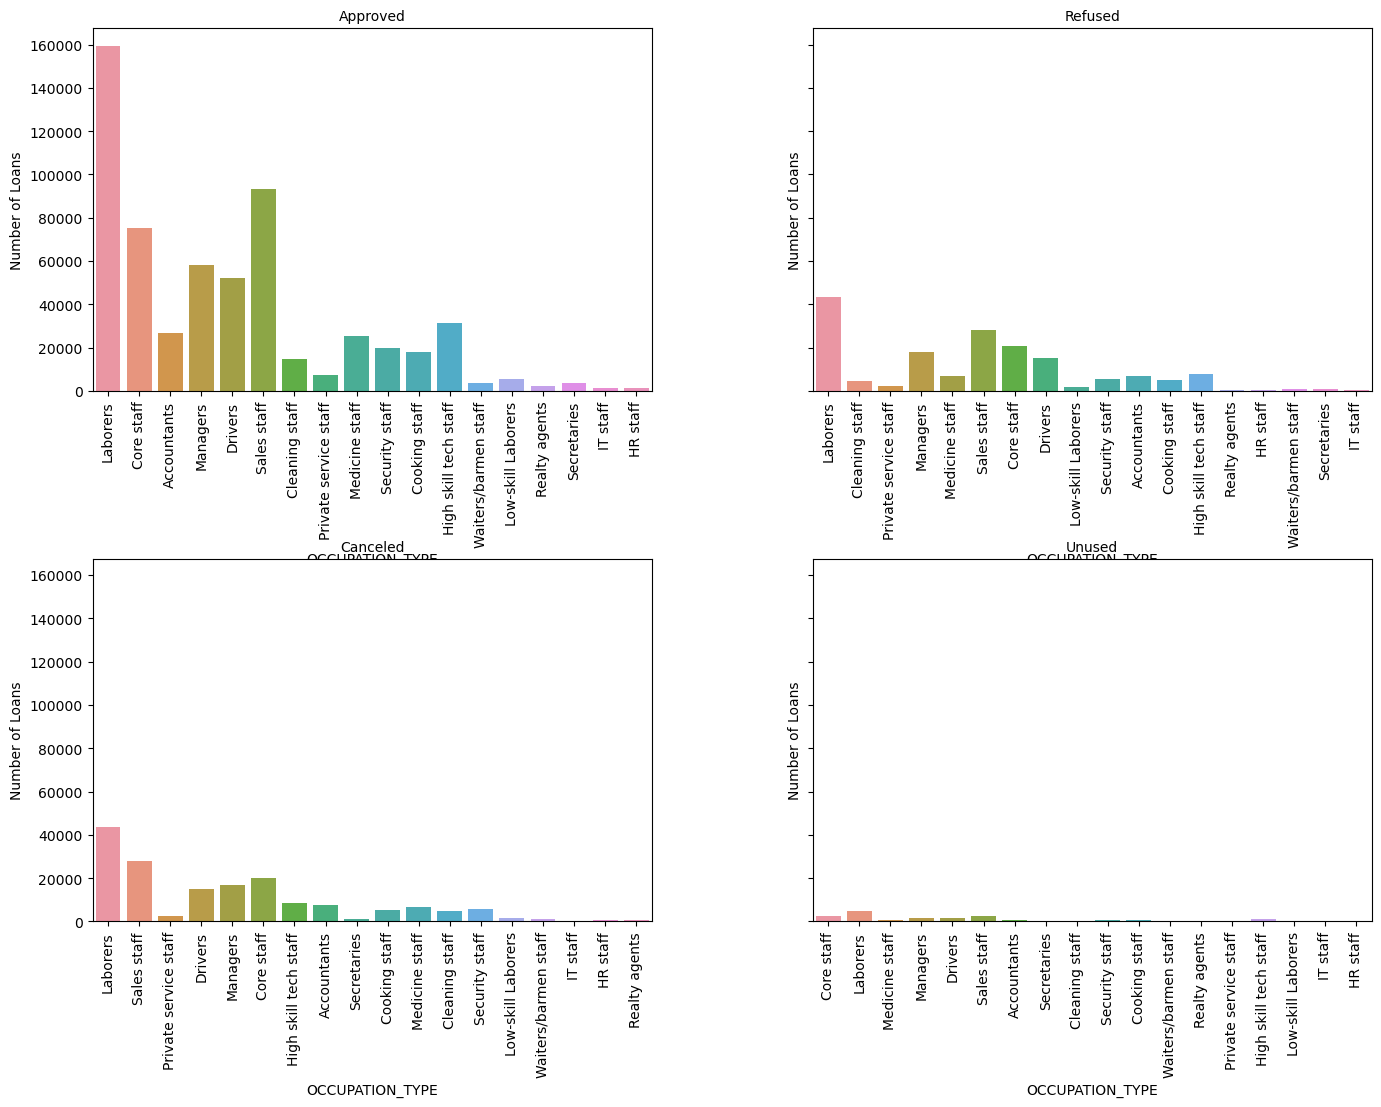

In [87]:
plotting('OCCUPATION_TYPE')

#### Here Labourers are getting the most approvals and refusals for Credit.

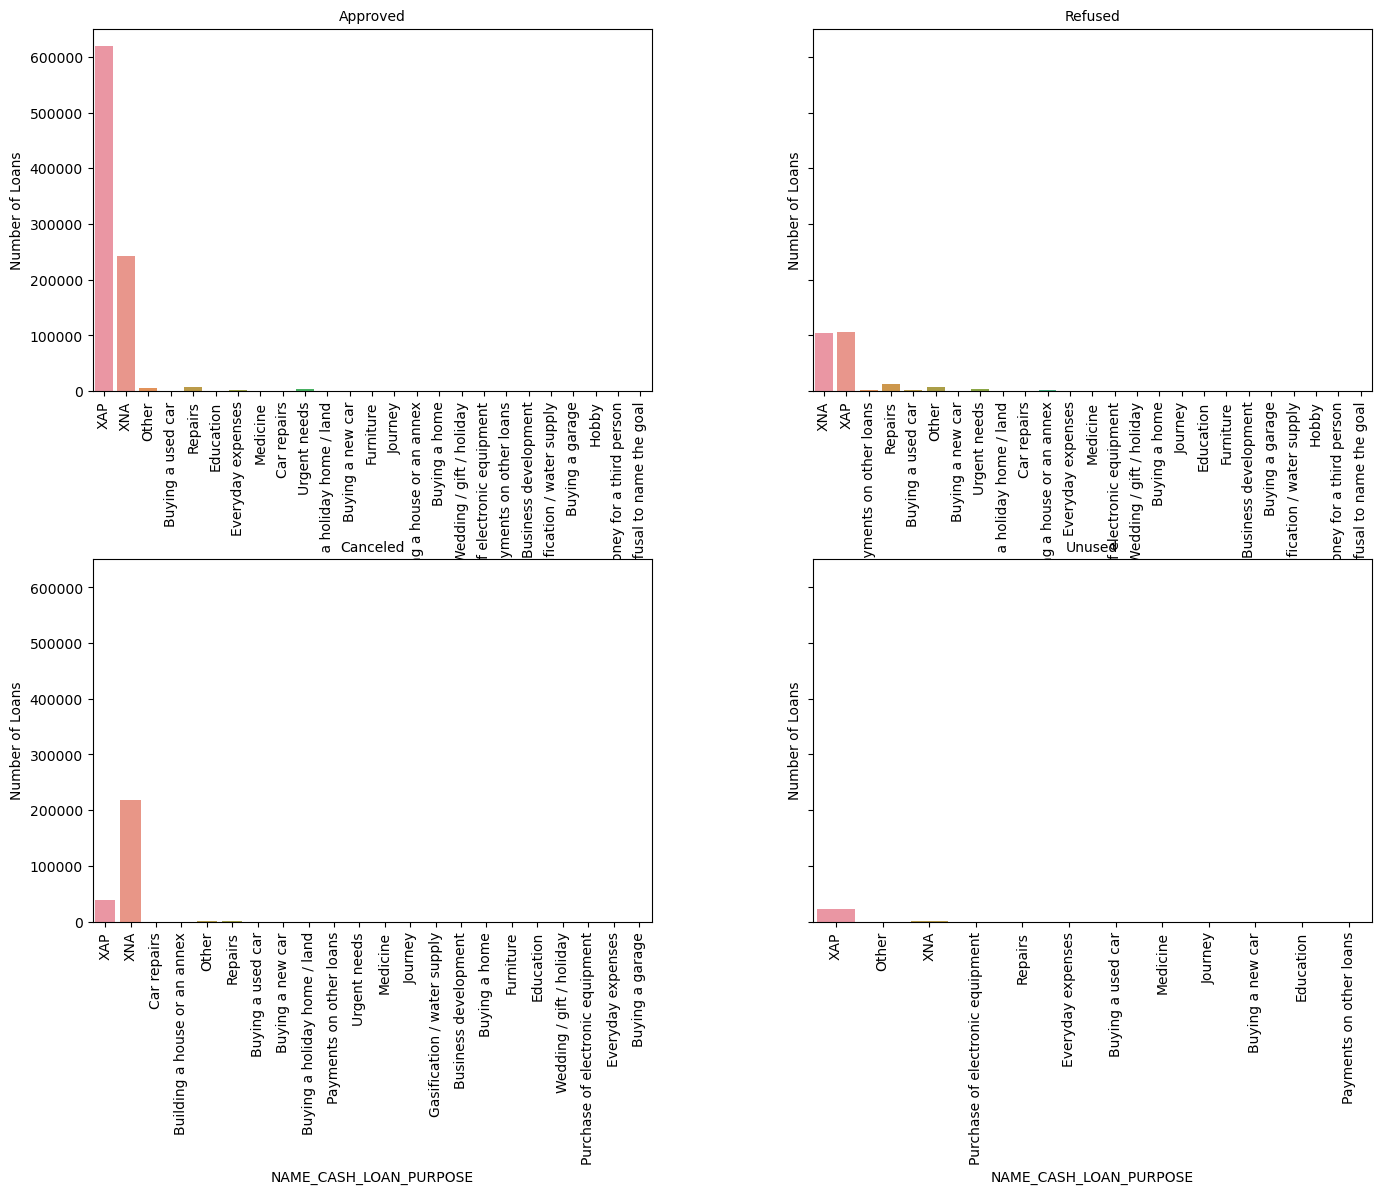

In [88]:
plotting('NAME_CASH_LOAN_PURPOSE')

#### Here we can deduce that loan purpose of Repairs get the most approvals and refusals.

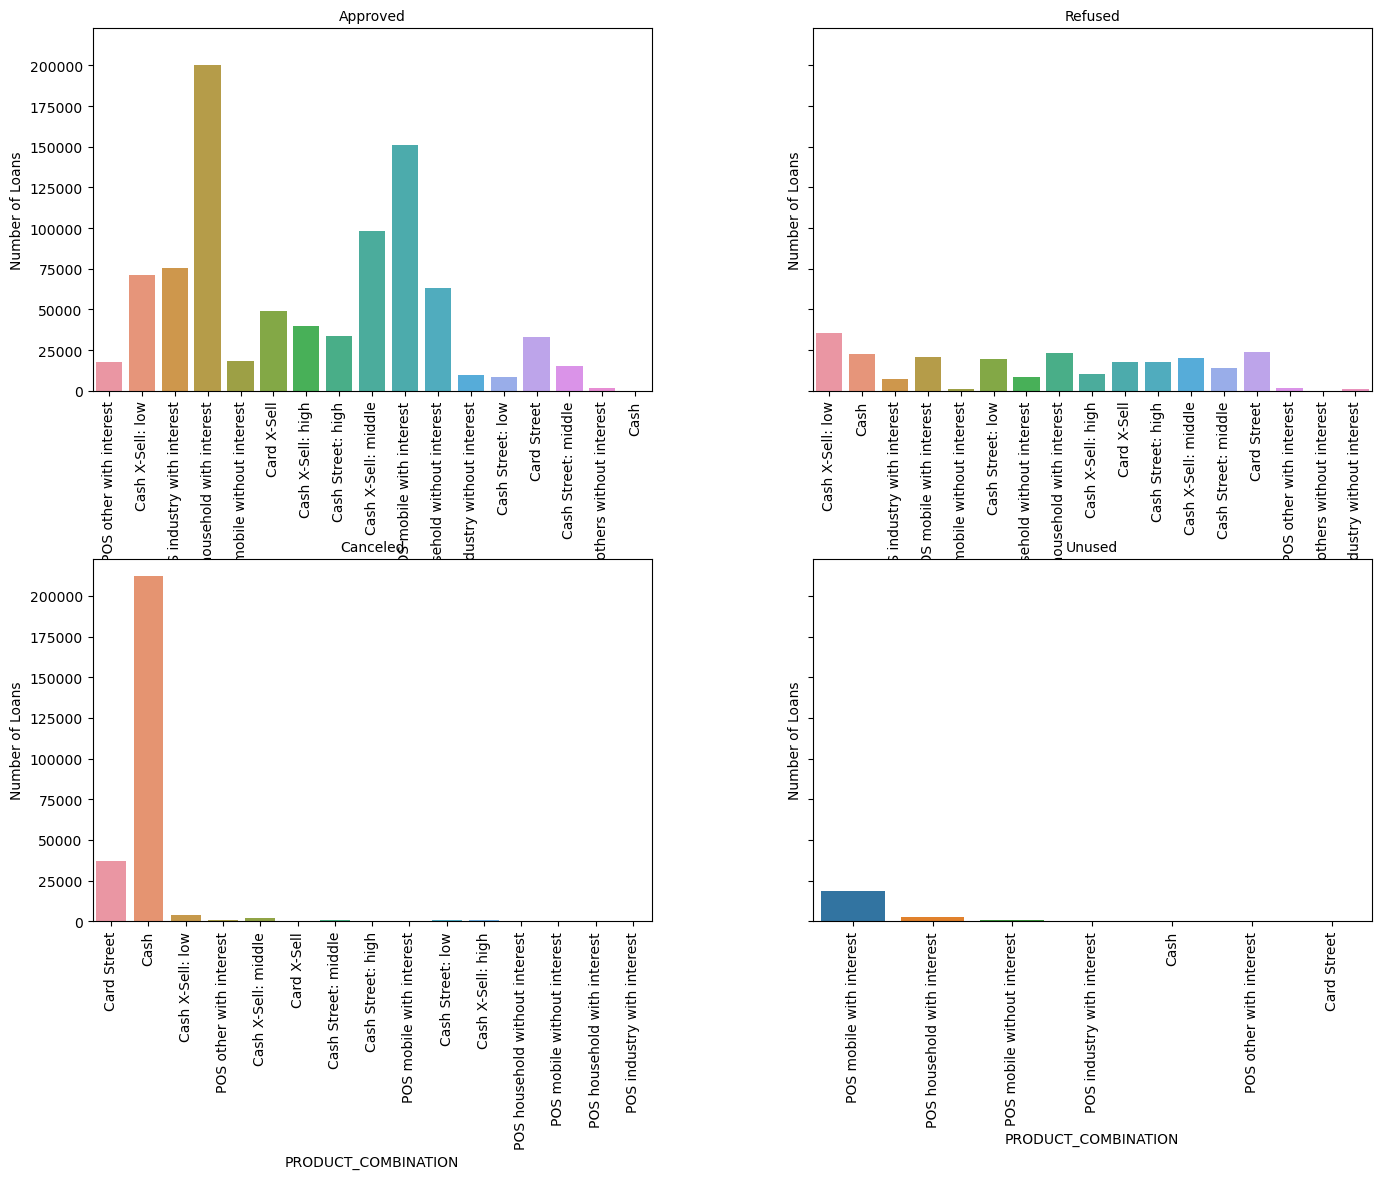

In [89]:
plotting('PRODUCT_COMBINATION')

#### Here we see that household with interest is getting the most approvals but is low in being refused.

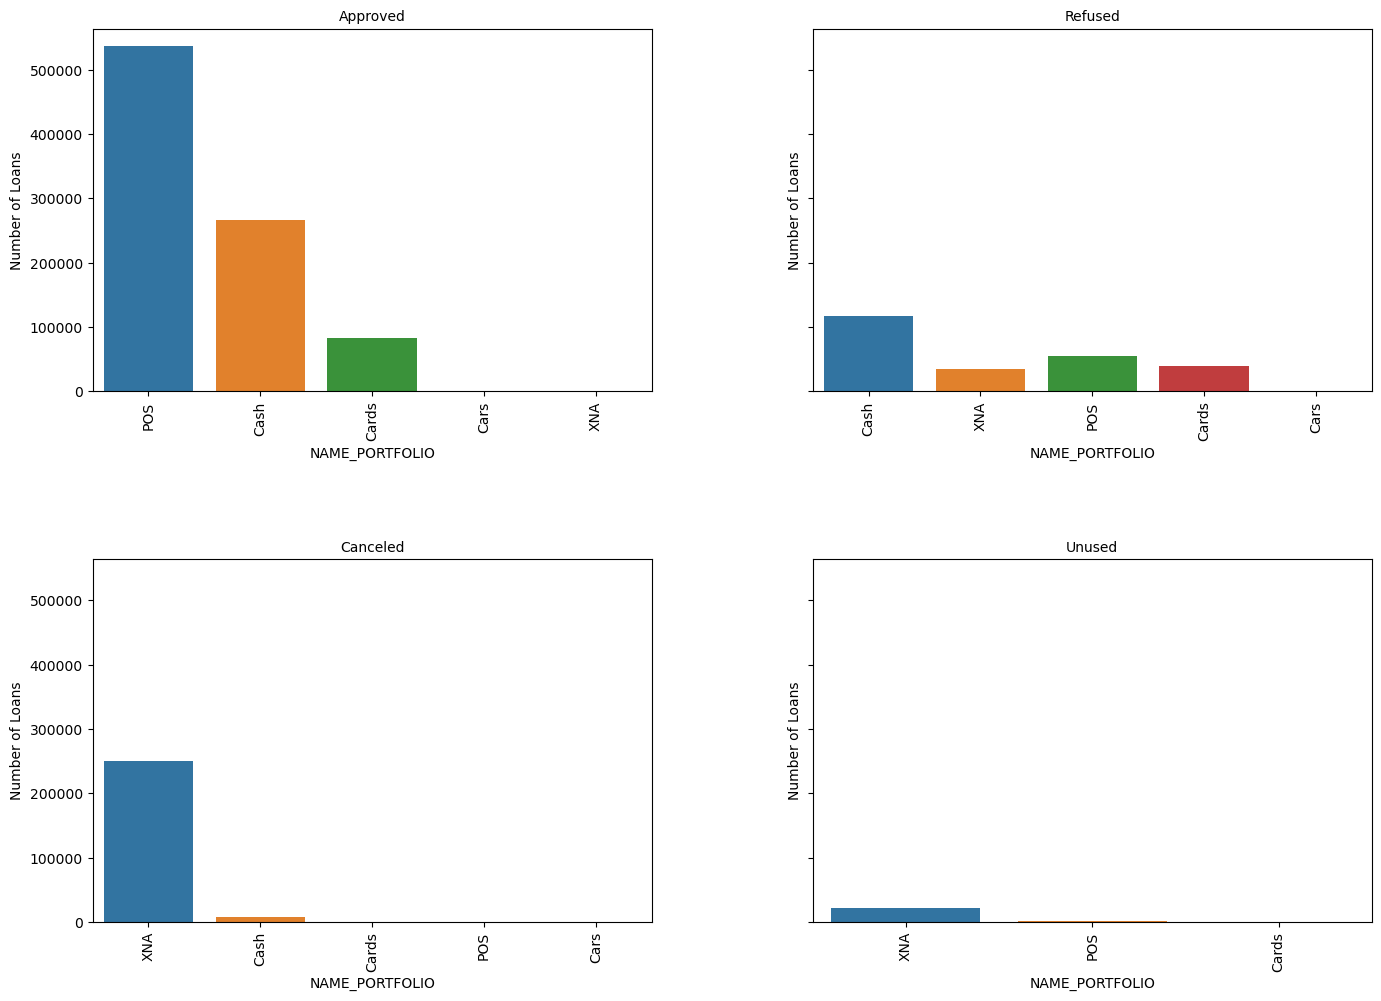

In [90]:
plotting('NAME_PORTFOLIO')

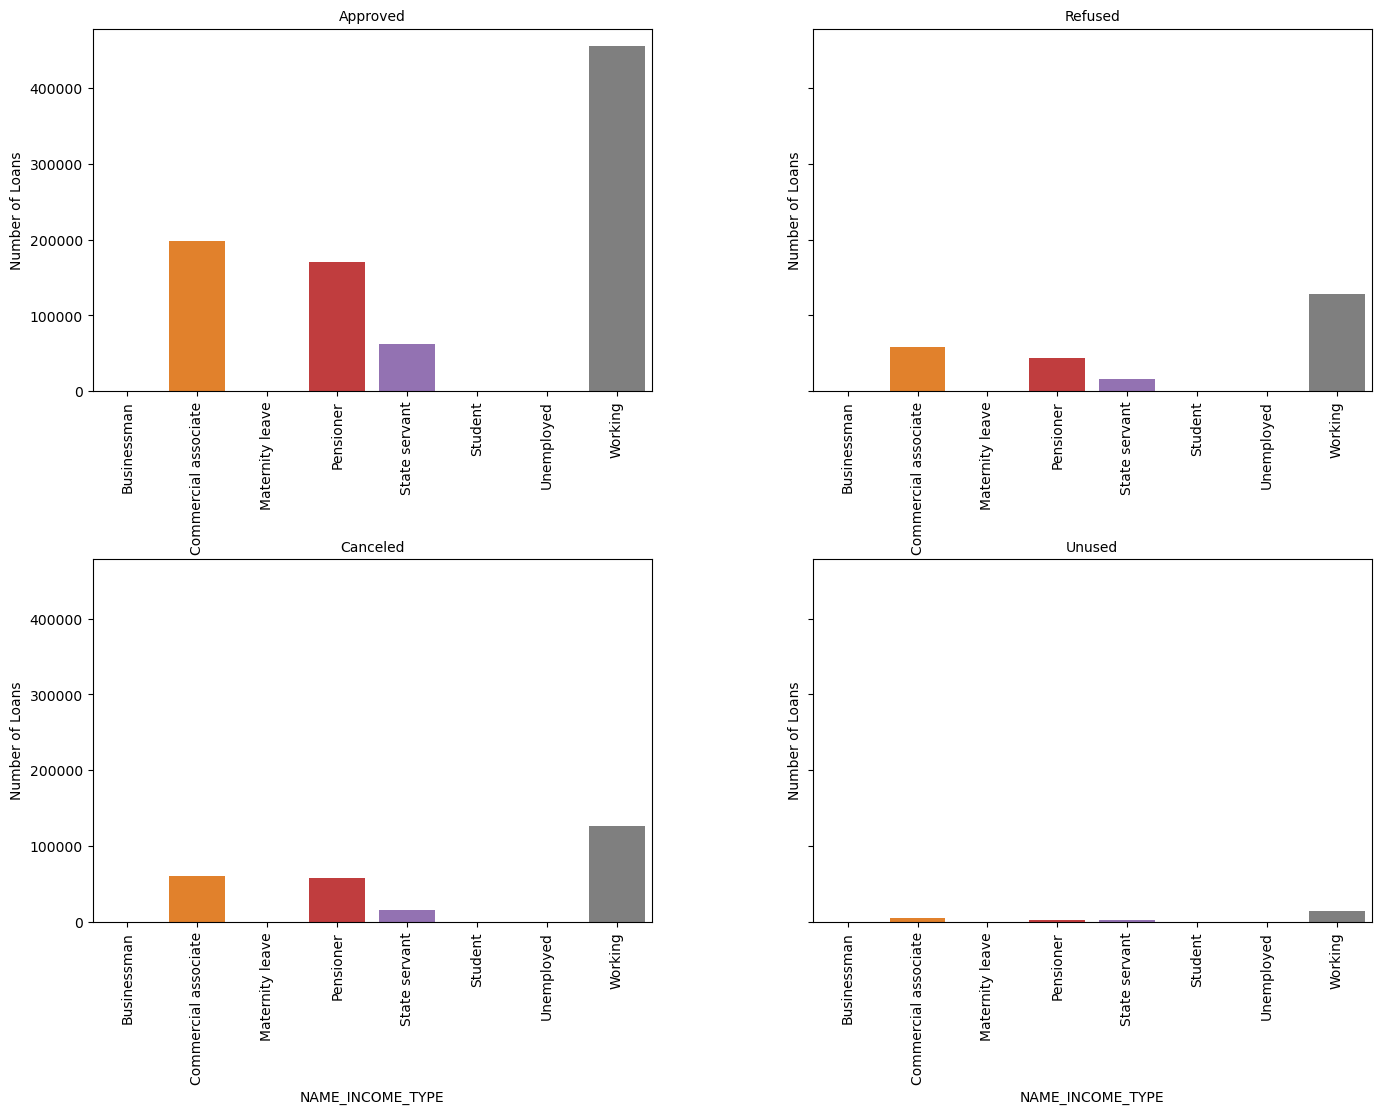

In [91]:
plotting('NAME_INCOME_TYPE')

#### Here most approved loans are in POS and the most refused are cash loans.

## Conclusion :

#### Banks should focus on Single persons as they have the least payment difficulty and also low refused rate. This may help them with successful payments.

#### Banks should focus less on 'Married Persons' as they have the most difficulties with payment and also have the highest approval. This may lead to higher payment difficulties.

#### Banks should not focus on Education status 'Academic Degree' as they have the most difficulties with payment. Instead they can focus on 'Lower Secondary' as they have the least difficulties with payment.

#### Banks can focus on 'Realty Agents' as they have somewhat lower difficulties with payments than 'Managers' and 'Accountants' but a lower approval rate. So, it might be beneficial to focus on that Occupation type.